## Graded Assignment 

**Welcome to your First ML Classification Graded assignment!**

A supervised problem is considerably easier to tackle than an unsupervised one. A problem in which we are required to predict a value is known as a supervised problem. For example, if the problem is to predict house prices given historical house prices, with features like presence of a hospital, school or supermarket, distance to nearest public transport, etc. is a upervised problem. Similarly, when we are provided with images of cats and dogs, and we know beforehand which ones are cats and which ones are dogs, and if the task is to create a model which predicts whether a provided image is of a cat or a dog, the problem is considered to be supervised.

To re-iterate our class lesson, Classification Problem has the following workflow:

- Understanding the Data Context
- Get Libraries & Import Dataset
- Data Cleaning (If Needed)
- Exploratory Data Analysis (EDA)
- Feature Preparation (Encoding & Scaling)
- Feature Selection based on Correlation
- Dataset split for Train, Val, Test
- Model Building & Selection
- Model Tuning and Validation 
- Model Performance on Test
- Feature Importance & Learning

In this assignment, you are required to go through each step and complete an end-to-end data science project.

Remember, there's always room to improve upon your approach, so even after the assignment has been submitted and graded, consider coming back and reviewing your code after a while with a fresher mind. Good luck!

**Remember Academic Honesty Code:**

- You're allowed to help a fellow by sharing a hint to Graded Assignment Solution.
- You're not allowed to copy paste entire solution from Online, We have list of resources with us.
- You're not allowed to show your entire solution or share notebook / document of solution with others.
- If someone is asking for a complete solution just whistle blow us and we will take care of the case without disclosure.

- All the Assignments are passed from Similarity Checkers and Manually reviewed by Volunteers to counter plagiarism.

- Any 1 found guilty of Violating above code as "Facilitator" or "Culprit" will be dealt with strict action with upto Rustication from course.

#### Understanding the Data Context

Please Check Dataset Details in Classroom Description for Understanding


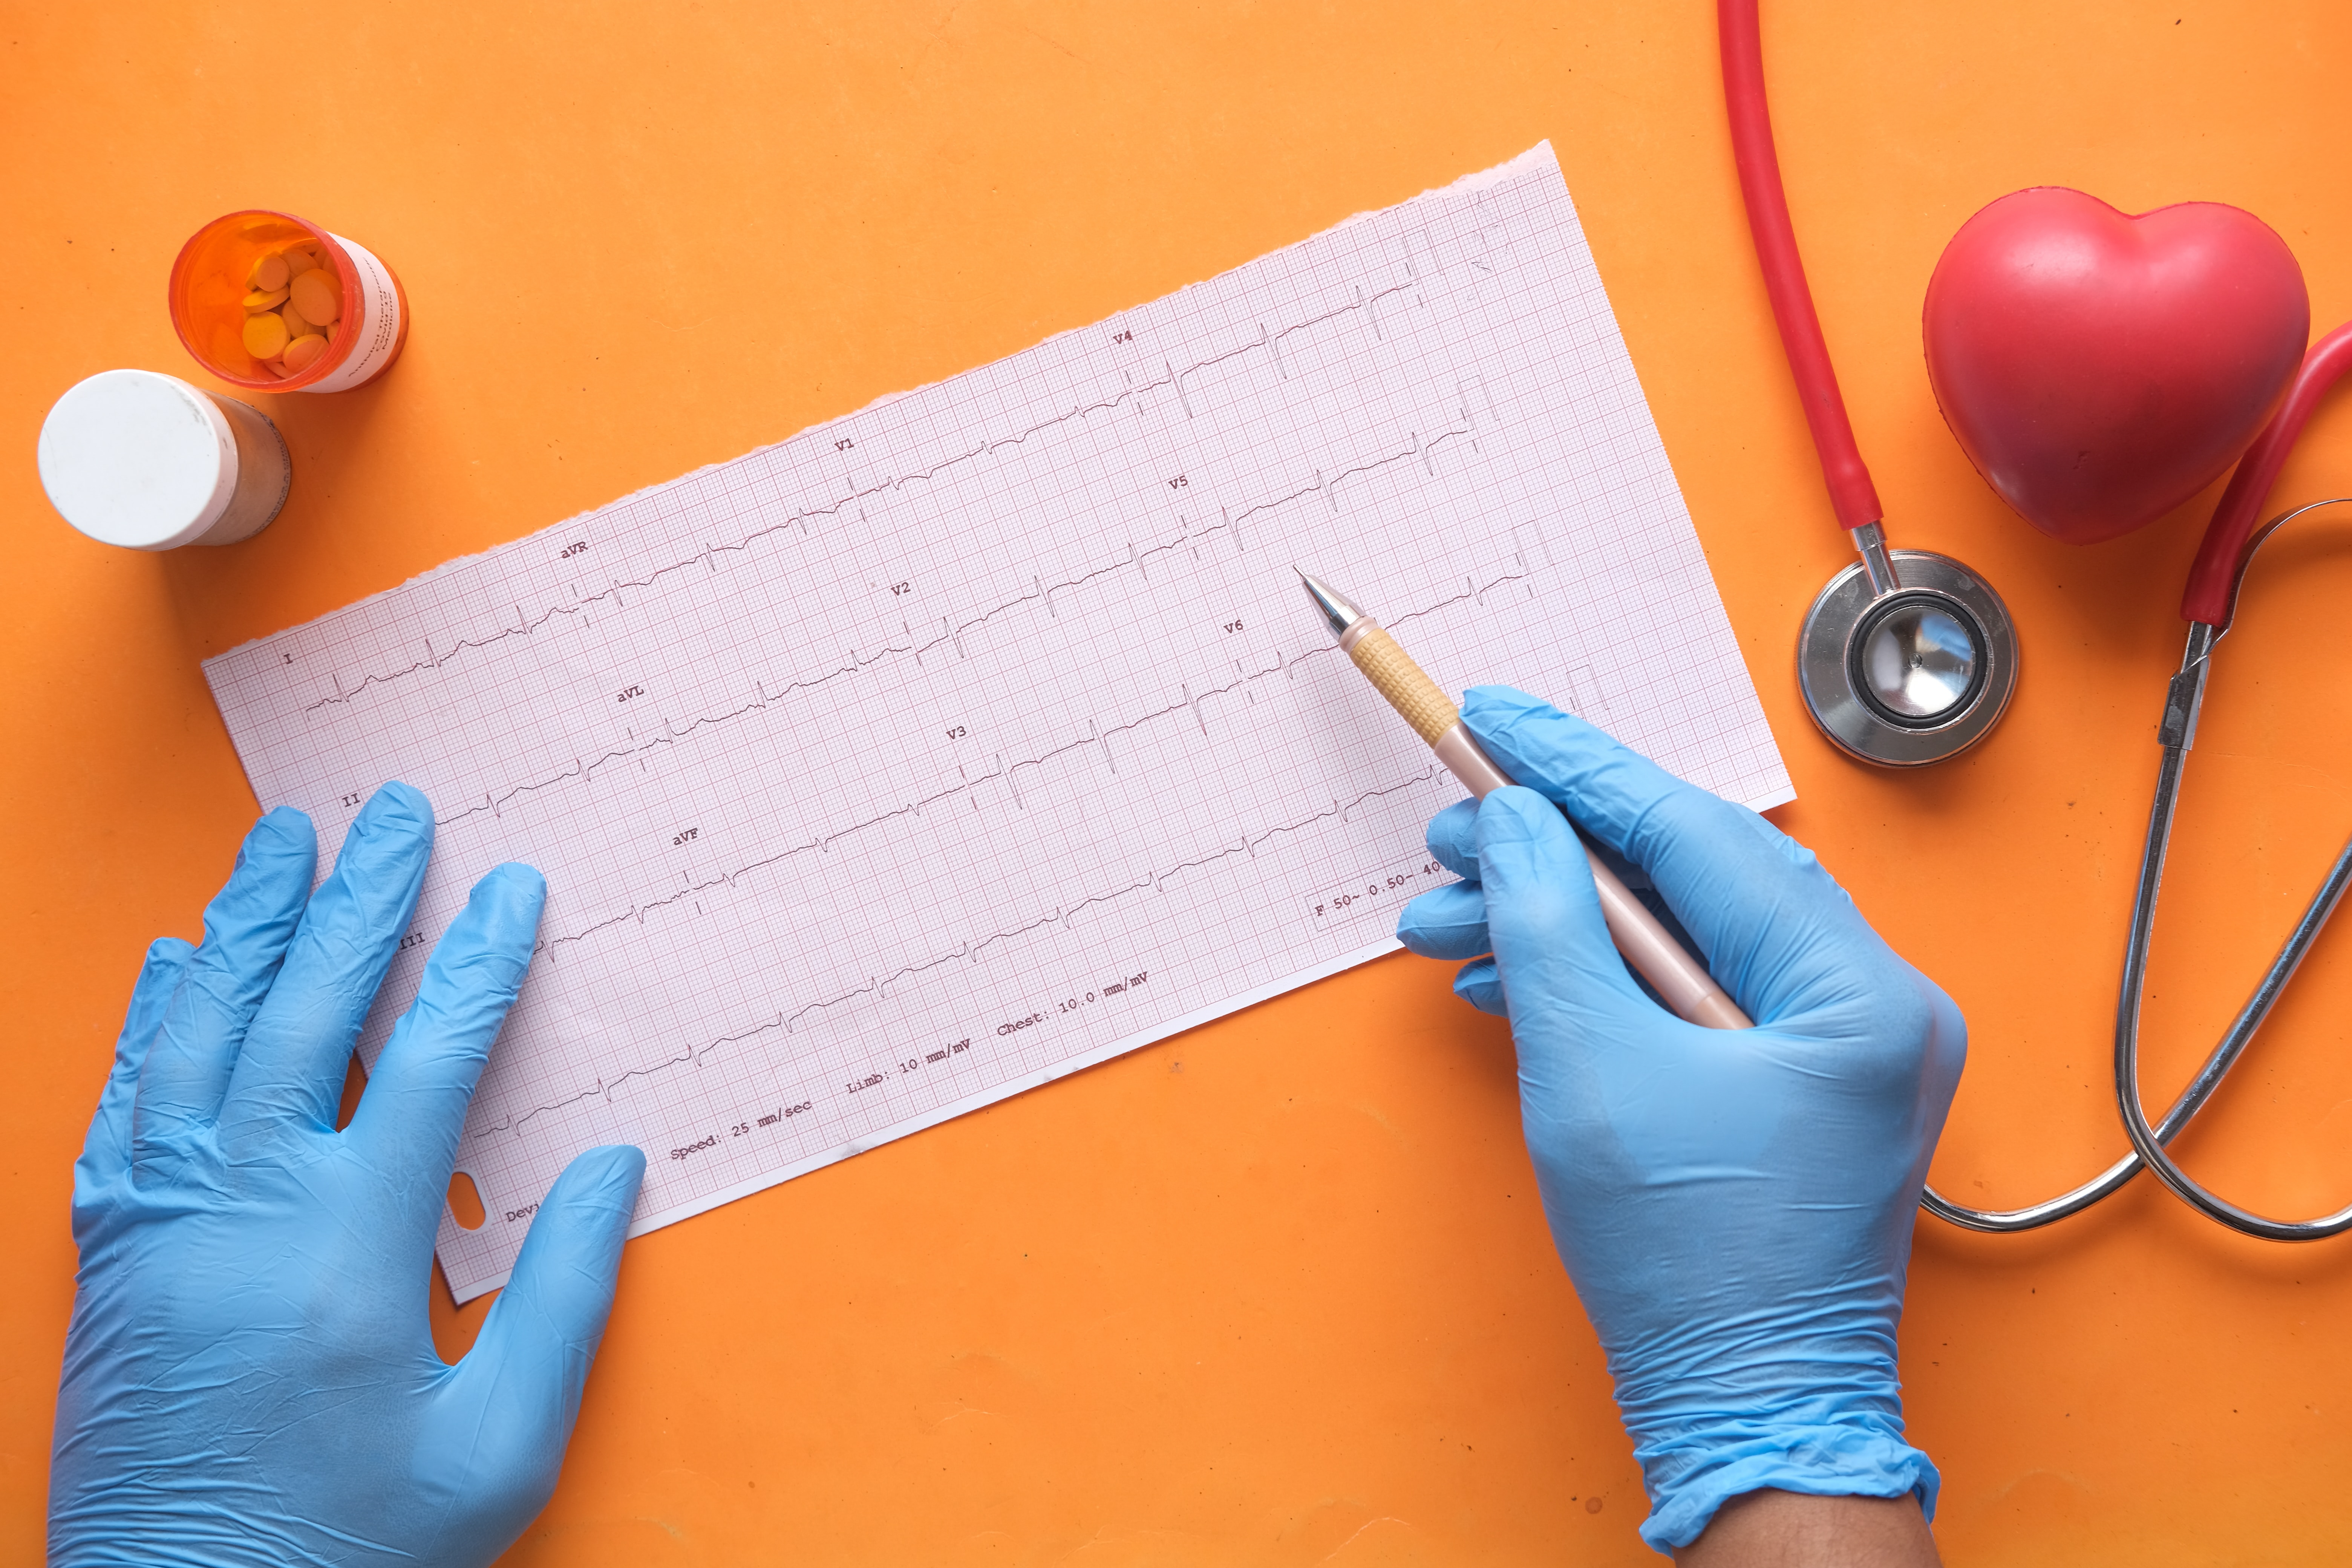

In [112]:
# IMPORTING GENERAL LIBRARIES FOR DATA ANALYSIS
# IMPORT FOR DATA VISUALIZATION / EDA
# IMPORTING REQUIRED LIBRARIES FOR ML

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
#import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

#### Step 1: Data Acquisition
Read your data into python

In [113]:
## Insert your Code Here (You can insert more cells as needed to present in an understandable format, Each code block should have outcome)

df = pd.read_csv('heart_data - heart_data.csv')

# checking head
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [114]:
df.shape

(918, 12)

#### Step 2 : Data Cleaning and Prep 
Remmeber our data cleaning checklist? 
- Fix missing values (Imputation can be considered)
- Remove duplicate values (where needed)
- Check Data Types beforehand 

Perform your data cleaning to get the data ready for the next step.

# 2.1 Fixing missing values


In [115]:
## Insert your Code Here (You can insert more cells as needed to present in an understandable format, Each code block should have outcome)

## What Steps did you take? Please Write Comment Below

# checking info.
df.info()

# checking null values       
print('\n',20*"-" , "NULL VALUES" , 20*'-','\n')
display(df.isna().sum())

# describe of data
print('\n',20*"-" , "DESCRIBE" , 20*'-','\n')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB

 -------------------- NULL VALUES -------------------- 



Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


 -------------------- DESCRIBE -------------------- 



Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [116]:
# checking unique values in each column to find any ? x 0 or * values enter mistakenly..

for i in df.columns:
    print("\n" , 20*"-",i.upper() ,20*"-")
    unique = df[i].unique()
    print(unique)
    for j in unique:
        if j == 0 or j== 'x'or j== '?' or j== '*' or j=='/':
            print("\nUnknown value found in this column : " , j)
            


 -------------------- AGE --------------------
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]

 -------------------- SEX --------------------
['M' 'F']

 -------------------- CHESTPAINTYPE --------------------
['ATA' 'NAP' 'ASY' 'TA']

 -------------------- RESTINGBP --------------------
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]

Unknown value found in this column :  0

 -------------------- CHOLESTEROL --------------------
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 2

### Observation:

#### We can see that our data set has no any unknown values except 0.
#### Now checking imporatnce of 0 in every column .(Either it is a null value or has some importance)
#### In 5 columns we have 0 values.

 * RESTINGBP has 0 value.
 * CHOLESTEROL has 0 value.
 * FASTINGBS has 0 value.
 * OLDPEAK has 0 value.
 * HEARTDISEASE has 0 value.




### Decision:

* As, we know that RESTINGBP , CHOLESTROL  can't be zero. We will replace it with nan value.
* FastingBS: [1: if FastingBS > 120 mg/dl, 0: otherwise](Given in data dictionary).The '0' values in the 'FastingBS' column indicate that the corresponding individuals have fasting blood sugar levels below or   equal to 120 mg/dl. This suggests that these individuals may be considered to have normal fasting blood sugar levels, as they   do not exceed the 120 mg/dl threshold.

* OLDPEAK has values from -2.6 till 6.2 . So , I infer that here 0 has some imporatnce in this column which we will discuss later.
* Column HEARTDISEASE contains 0 value means that it is a normal patient.

### 2.1.1 Replacing  0 from NaN.

In [117]:
# replacing 0 with NaN of RESTINGBP  and  CHOLESTROL

df['RestingBP'] = df['RestingBP'].replace(0 , np.NaN)
df['Cholesterol'] = df['Cholesterol'].replace(0 , np.NaN)

In [118]:
df.isna().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [119]:
print("\n" + 40 * "-" + " Describe the Data " + 40 * "-" + "\n")
print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).T)


---------------------------------------- Describe the Data ----------------------------------------

              count        mean        std   min      1%      5%    10%  \
Age           918.0   53.510893   9.432617  28.0   32.00   37.00   40.0   
RestingBP     917.0  132.540894  17.999749  80.0   95.16  107.60  110.0   
Cholesterol   746.0  244.635389  59.153524  85.0  126.00  165.25  180.0   
FastingBS     918.0    0.233115   0.423046   0.0    0.00    0.00    0.0   
MaxHR         918.0  136.809368  25.460334  60.0   77.17   96.00  103.0   
Oldpeak       918.0    0.887364   1.066570  -2.6   -0.50    0.00    0.0   
HeartDisease  918.0    0.553377   0.497414   0.0    0.00    0.00    0.0   

                50%    75%    90%     95%     99%    max  
Age            54.0   60.0   65.0   68.00   74.00   77.0  
RestingBP     130.0  140.0  160.0  160.00  180.00  200.0  
Cholesterol   237.0  275.0  310.0  339.75  439.55  603.0  
FastingBS       0.0    0.0    1.0    1.00    1.00    1.0  
Ma

### 2.1.2 Fixing RestingBP.

In [120]:
df['RestingBP'].median()   # checking median of resting bp

130.0

In [121]:
# RestingBP has only 1 null value so we replace it with its median.
df["RestingBP"] = df["RestingBP"].fillna(df["RestingBP"].median())

In [122]:
df["RestingBP"].isna().sum()    # checking again null values

0

### 2.1.3 Fixing Cholestrol.

In [123]:
# Calculate the percentage of null values in the 'Cholesterol' column
percentage_null = df['Cholesterol'].isnull().mean() * 100
percentage_null

18.736383442265794

Cholesrtrol has 18.7% null values.

#### Distribution of Cholestrol.

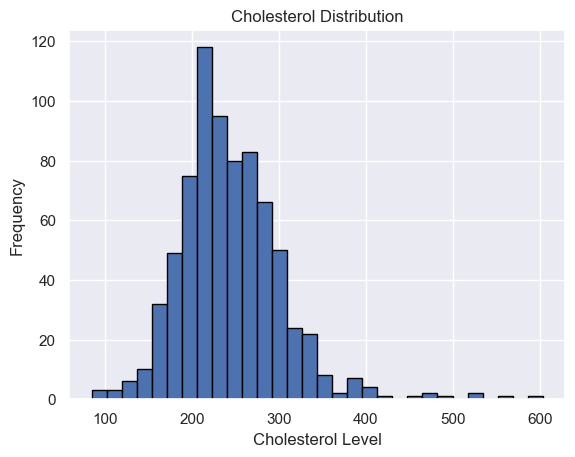

C:\Users\HP\AppData\Local\Temp\ipykernel_11600\718986393.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Cholesterol'].dropna(), shade=True)


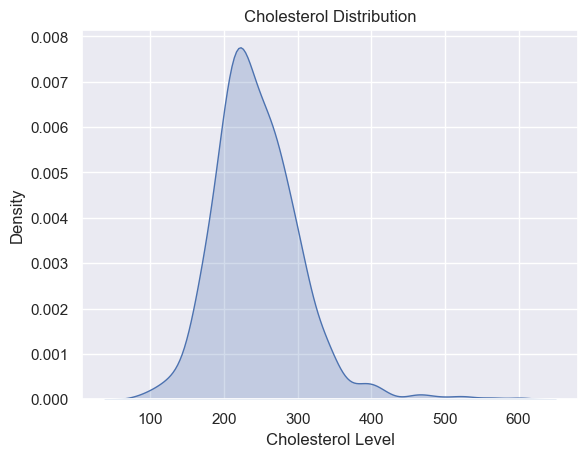

In [124]:

# Histogram using matplotlib
plt.hist(df['Cholesterol'].dropna(), bins=30, edgecolor='black')  # dropna() to exclude missing values
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.show()

# Density plot using seaborn
sns.kdeplot(df['Cholesterol'].dropna(), shade=True)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Density')
plt.show()


As, we can see that our data is right side skewed in cholestrol.It means it has some higher values.(Outliers)

In [125]:
print("Mean :  " , df['Cholesterol'].mean())

print("Median :  " , df['Cholesterol'].median())

Mean :   244.6353887399464
Median :   237.0


Median is 237.0 and the mean is 244.6353887399464, you can see that the mean value is slightly higher than the median, as is expected in a right-skewed distribution.

In a right-skewed distribution, the mean is influenced by high outliers. The median, however, is less sensitive to such extremes. Therefore, in this situation, we prefer to impute with the median to provide a more representative value without introducing bias.

In [126]:
# fillna with it's median value.

df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())

In [127]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

#### Heat map and correlation to see their relationship.

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.263054     0.045535   0.198039 -0.382045  0.258612   
RestingBP     0.263054   1.000000     0.086079   0.067896 -0.109771  0.174130   
Cholesterol   0.045535   0.086079     1.000000   0.024917 -0.001600  0.054500   
FastingBS     0.198039   0.067896     0.024917   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.109771    -0.001600  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.174130     0.054500   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.117798     0.076114   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.117798  
Cholesterol       0.076114  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


C:\Users\HP\AppData\Local\Temp\ipykernel_11600\3538790710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr()
C:\Users\HP\AppData\Local\Temp\ipykernel_11600\3538790710.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


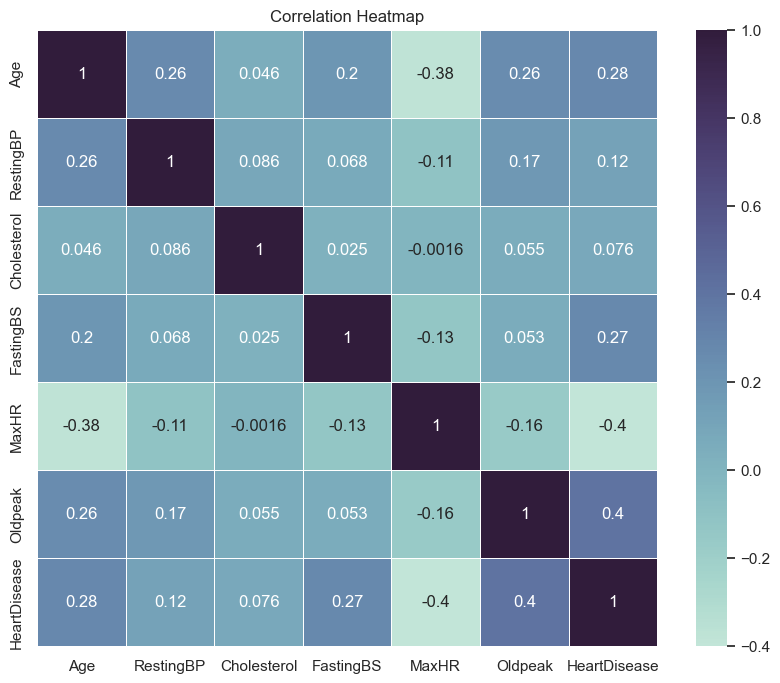

In [128]:
corr_df = df.corr()
print(corr_df)

# Define the crest palette
crest_palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Using the "crest" palette for the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df ,cmap = crest_palette ,  annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Observation:

Co relation with heart disease..

Age           :       0.282039  
RestingBP      :      0.117798  
Cholesterol     :     0.076114  
FastingBS       :     0.267291  
MaxHR            :   -0.400421  
Oldpeak        :      0.403951  


### Heart disease has positive relation with age ,resting bp, cholesterol, fasting bs and old peak but negative relation with MaxHR.

### Cholesterol has very minor relation ship with heart disease.

# 2.2 Checking dupliactes

In [129]:
# checking duplicates from our dataframe

df.duplicated().sum()

0

# 2.3 Check Data Types

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


In [131]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP         float64
Cholesterol       float64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Some of data types are not correct. The code below change their types.(Reason is in the comments).

#### 2.3.1 Changing data types.

In [132]:
#changing restingBP datatype from float to int as it has discrete values
df['RestingBP'] = df['RestingBP'].astype(int)

#changing cholestrol datatype from float to int as it has discrete values
df['Cholesterol'] = df['Cholesterol'].astype(int)

#changing Fasting Bp datatype from int to obj as it has 0 and 1([1: if FastingBS > 120 mg/dl, 0: otherwise],so it is categorical variable.)
df['FastingBS'] = df['FastingBS'].astype(object)

In [133]:
df.dtypes   # checking data types again.

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int32
Cholesterol         int32
FastingBS          object
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

#### Step 3 : EDA & Distributions

Your Dataset Specific Instructions for EDA

Include Distribution Plots and Historgrams vs Target Variable

## 3. Distribution of Heart Disease in the Dataset

In [134]:
## Insert your Code Here (You can insert more cells as needed to present in an understandable format, Each code block should have outcome)

## What is your observation here? Please Write Comment Below

# count of outcomes variable that how many has heart disease or not.
value_counts = df['HeartDisease'].value_counts()
value_counts

1    508
0    410
Name: HeartDisease, dtype: int64

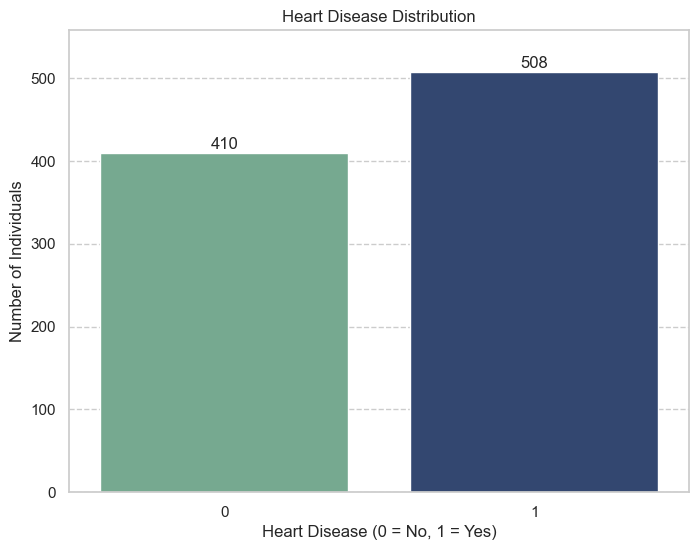

In [135]:
# Setting the style for the background grid and aesthetics
sns.set_style("whitegrid", {"grid.linestyle": "--"})

# Set the color palette as specified
crest_palette = sns.color_palette("crest", as_cmap=True)

# Selecting two distinct colors from the crest palette
colors_crest = [crest_palette(0.2), crest_palette(0.9)]

# Plotting with seaborn using the extracted specifications and viridis colors
plt.figure(figsize=(8,6))
ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette=colors_crest)


# Adding the count values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            int(height), 
            ha="center") 

# Setting title and labels using the extracted specifications
plt.title('Heart Disease Distribution')
plt.ylabel('Number of Individuals')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.xticks(rotation=0)
plt.ylim(0, value_counts.max() + 50)  # Adjusting y-axis limit to make room for the text
plt.show()


#### In the given Heart Disease Dataset, 410 has no heart disease and 508 has heart disease.

## 3.1 Percentage Distribution of Heart Disease 

In [136]:
# calculating heart disease percentage


total = value_counts.sum()
percentage_outcome = (value_counts / total) * 100
percentage_outcome

1    55.337691
0    44.662309
Name: HeartDisease, dtype: float64

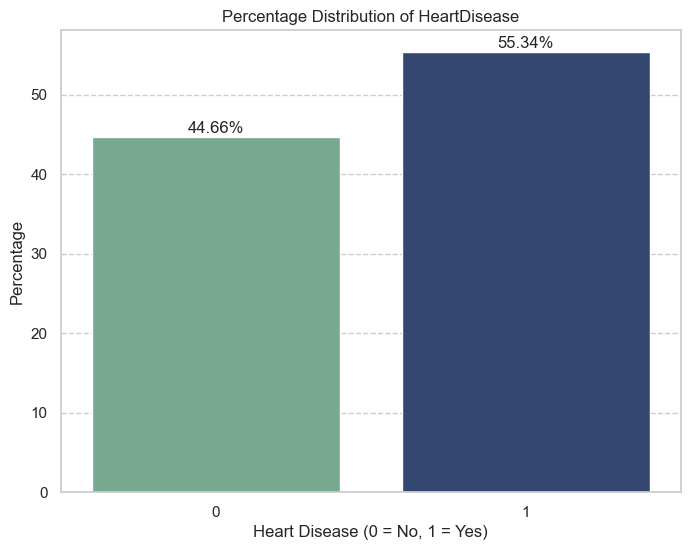

In [137]:
# Setting the style for the background grid and aesthetics
sns.set_style("whitegrid", {"grid.linestyle": "--"})

# Plotting with seaborn using the "crest" color palette
plt.figure(figsize=(8,6))
ax = sns.barplot(x=percentage_outcome.index, y=percentage_outcome.values, palette=colors_crest)

# Set the color palette as specified
crest_palette = sns.color_palette("crest", as_cmap=True)

# Selecting two distinct colors from the crest palette
colors_crest = [crest_palette(0.2), crest_palette(0.8)]

# Adding the percentage values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5,
            '{:1.2f}%'.format(height), 
            ha="center") 


plt.title('Percentage Distribution of HeartDisease')
plt.ylabel('Percentage')
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.xticks(rotation=0)
plt.show()


## 3.2 Distribution of Categorical variables.

### 3.2.1 Gender Distribution 

In [138]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

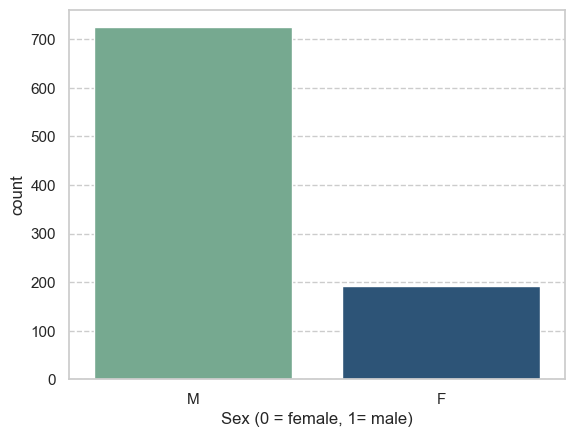

In [139]:
sns.countplot(x='Sex', data=df,  palette=colors_crest)
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

### 3.2.1.2 Percentage of Gender Distribution

In [140]:
# Calculating the percentage distribution for 'Sex'
percentage_sex = (df['Sex'].value_counts() / len(df) * 100)
percentage_sex 

M    78.976035
F    21.023965
Name: Sex, dtype: float64

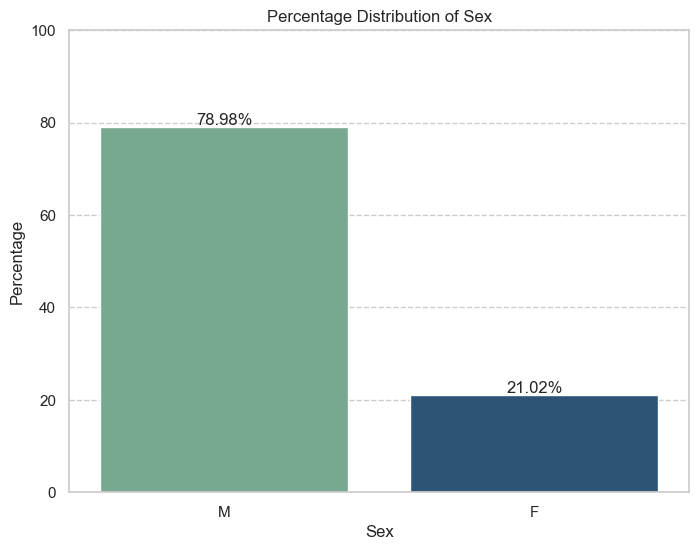

In [141]:
# Plotting the percentage distribution for 'Sex' using the earlier design specifications
plt.figure(figsize=(8,6))
ax = sns.barplot(x=list(percentage_sex.keys()), y=list(percentage_sex.values), palette=colors_crest)

# Adding the percentage values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.5,
            '{:1.2f}%'.format(height), 
            ha="center") 

# Setting title and labels using the extracted specifications
plt.title('Percentage Distribution of Sex')
plt.ylabel('Percentage')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Adjusting y-axis limit to make room for the text

# Display the plot
plt.show()


### 3.2.2 Distribution of Heart Disease by Gender 

In [142]:
# Counting the number of males and females for each heart disease category (0 or 1)
count_sex_heart_disease= df.groupby(['HeartDisease','Sex'])['Sex'].count()
count_sex_heart_disease

HeartDisease  Sex
0             F      143
              M      267
1             F       50
              M      458
Name: Sex, dtype: int64

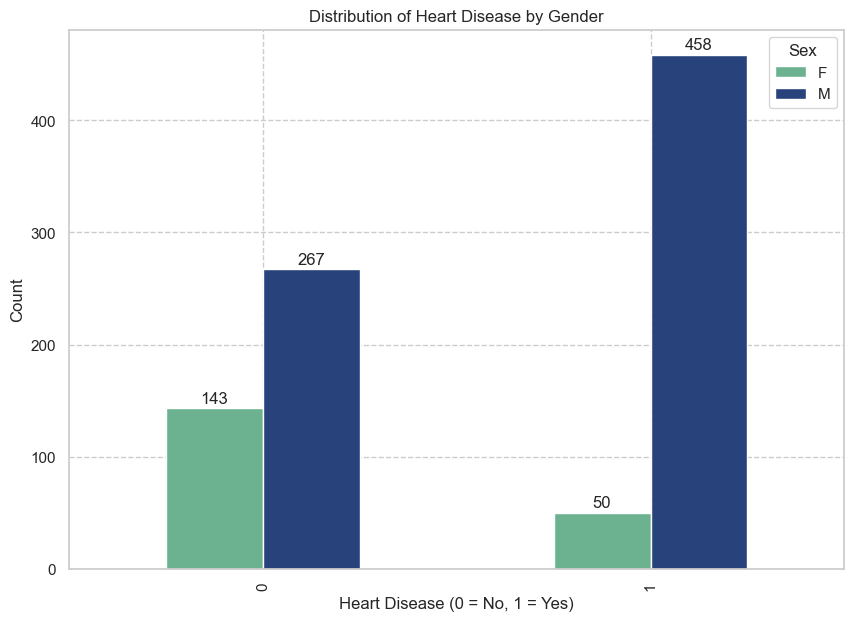

In [143]:

# Setting the color palette as specified
crest_palette = sns.color_palette("crest", as_cmap=True)

# Selecting two distinct colors from the crest palette
colors_crest = [crest_palette(0.2), crest_palette(0.9)]

# Replotting the distribution of heart disease by gender with numbers on the bars
plt.figure(figsize=(10,7))
ax = count_sex_heart_disease.unstack().plot(kind='bar', color=colors_crest, edgecolor='white', ax=plt.gca())

# Adding the count values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            int(height), 
            ha="center") 

plt.title('Distribution of Heart Disease by Gender')
plt.ylabel('Count')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.legend(title='Sex')
plt.show()


#### Summary:

* 143 females do not have heart disease.
* 267 males do not have heart disease.
* 50 females have heart disease.
* 458 males have heart disease.


This indicates that a higher number of males in this dataset have heart disease compared to females. Additionally, the majority of both males and females in the dataset do not have heart disease, though the proportion of affected males is considerably higher than that of affected females.

## 3.2.3 Distribution of Chest Pain Type:

In [144]:
chest_pain_distribution = df['ChestPainType'].value_counts()
chest_pain_distribution

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

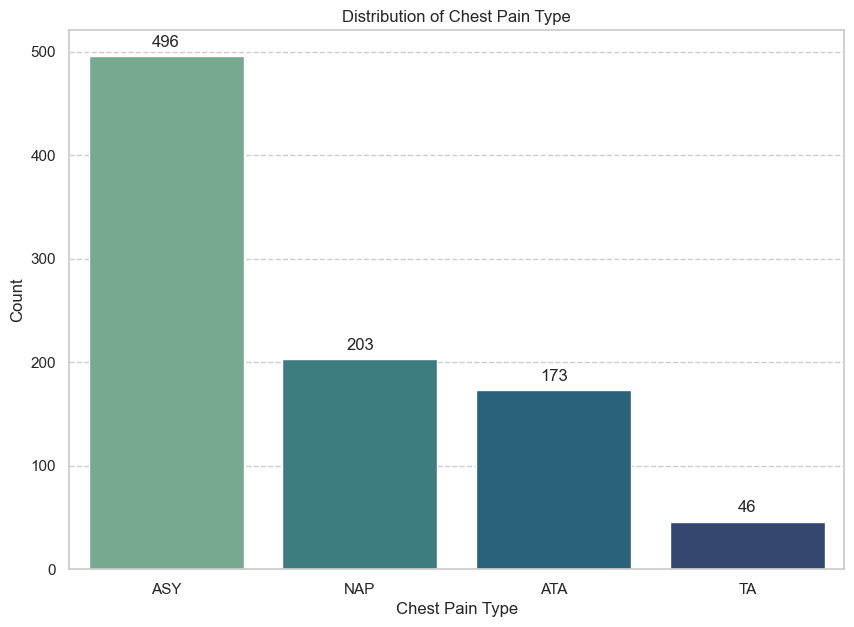

In [145]:
# Expanding the color palette to have four distinct colors from the crest palette
colors_crest_extended = [crest_palette(0.2), crest_palette(0.5), crest_palette(0.7), crest_palette(0.9)]

# Plotting the distribution of the 'Chest Pain Type' .
plt.figure(figsize=(10, 7))
ax = sns.barplot(y=chest_pain_distribution.values, x=chest_pain_distribution.index, palette=colors_crest_extended)

# Adding count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Distribution of Chest Pain Type')
plt.ylabel('Count')
plt.xlabel('Chest Pain Type')
plt.show()



In [146]:
count_chestpain_heart_disease = df.groupby(['HeartDisease' , 'ChestPainType'])['ChestPainType'].agg('count')
count_chestpain_heart_disease

HeartDisease  ChestPainType
0             ASY              104
              ATA              149
              NAP              131
              TA                26
1             ASY              392
              ATA               24
              NAP               72
              TA                20
Name: ChestPainType, dtype: int64

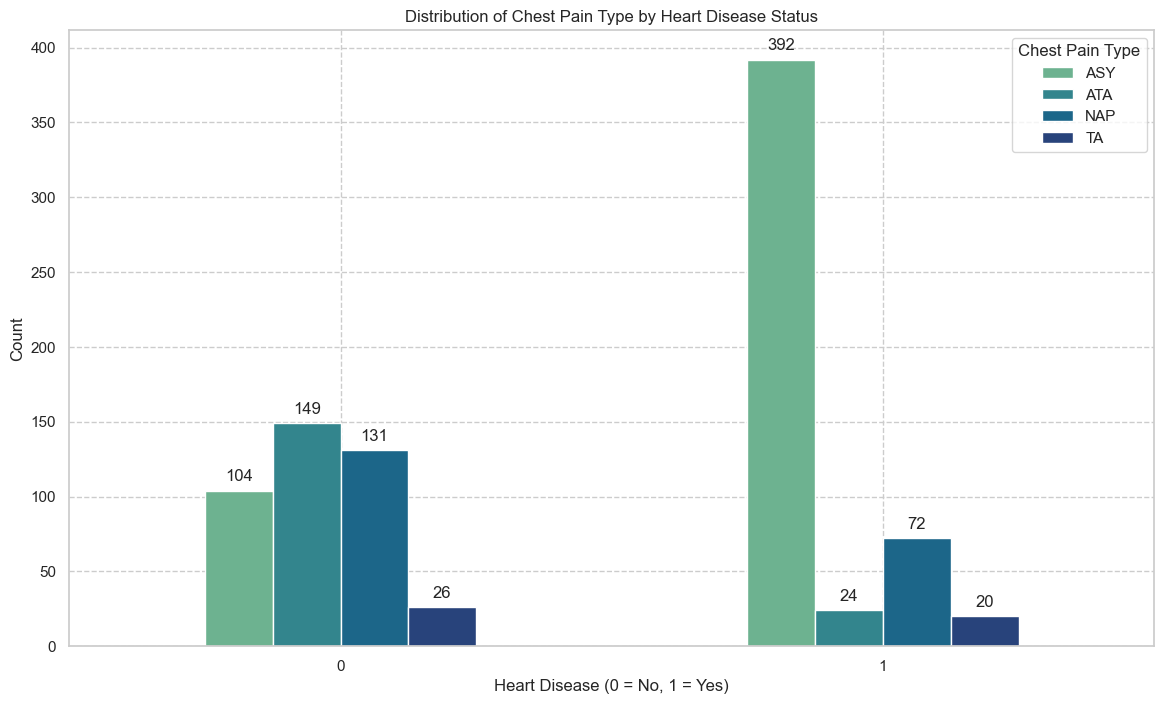

In [147]:
# Plotting the data directly from the grouped DataFrame
plt.figure(figsize=(14, 8))
count_chestpain_heart_disease.unstack().plot(kind='bar', color=colors_crest_extended, edgecolor='white', ax=plt.gca())

# Adding count labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points')

plt.title('Distribution of Chest Pain Type by Heart Disease Status')
plt.ylabel('Count')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.legend(title='Chest Pain Type')
plt.xticks(rotation=0)
plt.show()



From the chart, we can see that many people with heart disease have the "ASY" type of chest pain. This might mean that if someone has this kind of pain, they could be more likely to have heart disease.

In [148]:
count_chestpain_heart_disease_sex = df.groupby(['HeartDisease' , 'ChestPainType','Sex'])['ChestPainType'].agg('count')
count_chestpain_heart_disease_sex

HeartDisease  ChestPainType  Sex
0             ASY            F       31
                             M       73
              ATA            F       56
                             M       93
              NAP            F       47
                             M       84
              TA             F        9
                             M       17
1             ASY            F       39
                             M      353
              ATA            F        4
                             M       20
              NAP            F        6
                             M       66
              TA             F        1
                             M       19
Name: ChestPainType, dtype: int64

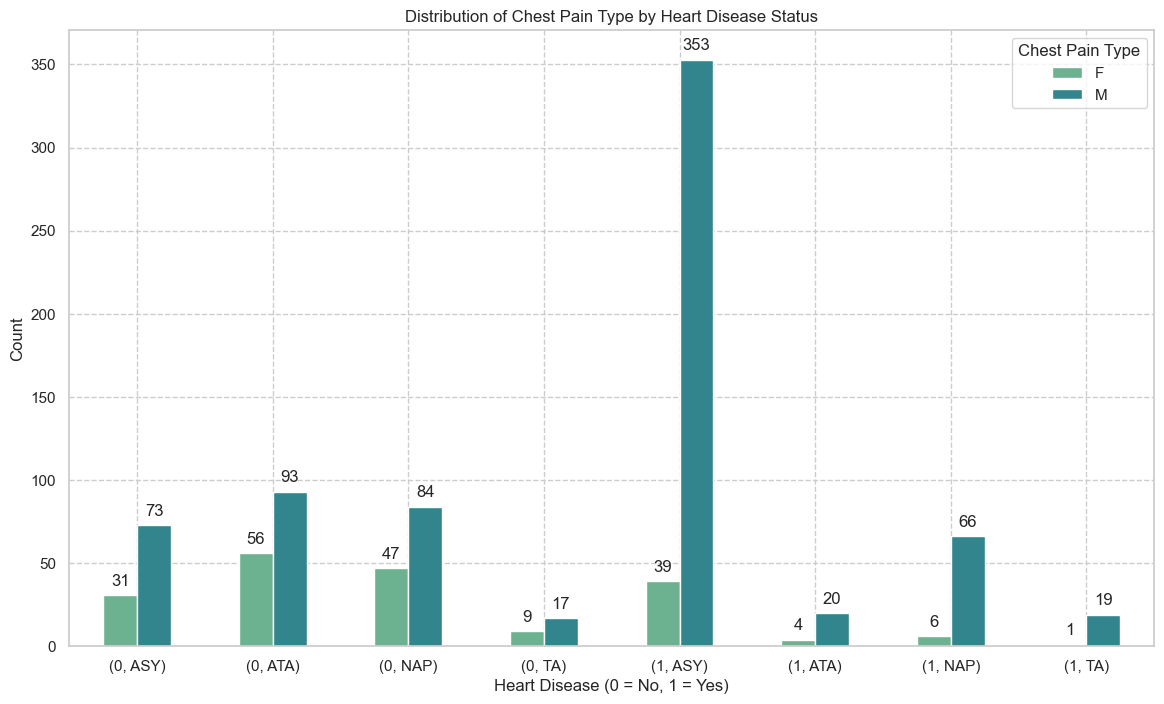

In [149]:
# Plotting the data directly from the grouped DataFrame
plt.figure(figsize=(14, 8))
count_chestpain_heart_disease_sex.unstack().plot(kind='bar', color=colors_crest_extended, edgecolor='white', ax=plt.gca())

# Adding count labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points')

plt.title('Distribution of Chest Pain Type by Heart Disease Status')
plt.ylabel('Count')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.legend(title='Chest Pain Type')
plt.xticks(rotation=0)
plt.show()


#### Summary:

Men with heart disease primarily experience 'ASY' chest pain.
In essence, 'ASY' chest pain is a dominant indicator among men with heart disease, while 'ATA' is more prevalent in those without heart disease.

### 3.2.4 Distribution of RestingECG

In [150]:
df['RestingECG'].unique()        # finding unique values in resting ecg

array(['Normal', 'ST', 'LVH'], dtype=object)

#### * Normal   :
        In a resting ECG, "Normal" means everything looks as it should, showing a healthy heart activity.
    
#### * LVH (Left Ventricular Hypertrophy)  :
       LVH shows that the left chamber of your heart has thicker walls than usual, often due to high blood pressure.
       
#### * ST  :
    The ST segment in a resting ECG is a flat line that appears after each heartbeat. If it's higher or lower than the              flat line, it can indicate a problem like a heart attack or lack of blood flow to the heart.

In [151]:
restingecg_distribution= df['RestingECG'].value_counts()    # count of unique values in resting ecg
restingecg_distribution

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

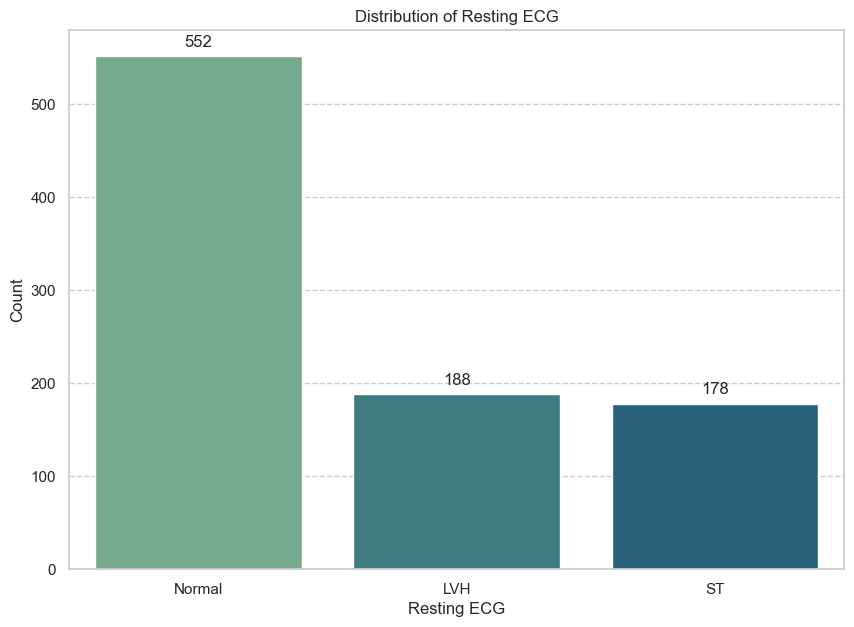

In [152]:
# Expanding the color palette to have four distinct colors from the crest palette
colors_crest_extended = [crest_palette(0.2), crest_palette(0.5), crest_palette(0.7), crest_palette(0.9)]

# Plotting the distribution of the 'Resting ecg' column against 'HeartDisease' using the specified colors
plt.figure(figsize=(10, 7))
ax = sns.barplot(y=restingecg_distribution.values, x=restingecg_distribution.index, palette=colors_crest_extended)

# Adding count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Distribution of Resting ECG')
plt.ylabel('Count')
plt.xlabel('Resting ECG')
plt.show()


In [153]:
# Distribution of resting ecg vs heart disease(in which state of resting ecg people have heart disease.)

count_restingecg_heart_disease = df.groupby(['HeartDisease' , 'RestingECG'])['RestingECG'].agg('count')
count_restingecg_heart_disease

HeartDisease  RestingECG
0             LVH            82
              Normal        267
              ST             61
1             LVH           106
              Normal        285
              ST            117
Name: RestingECG, dtype: int64

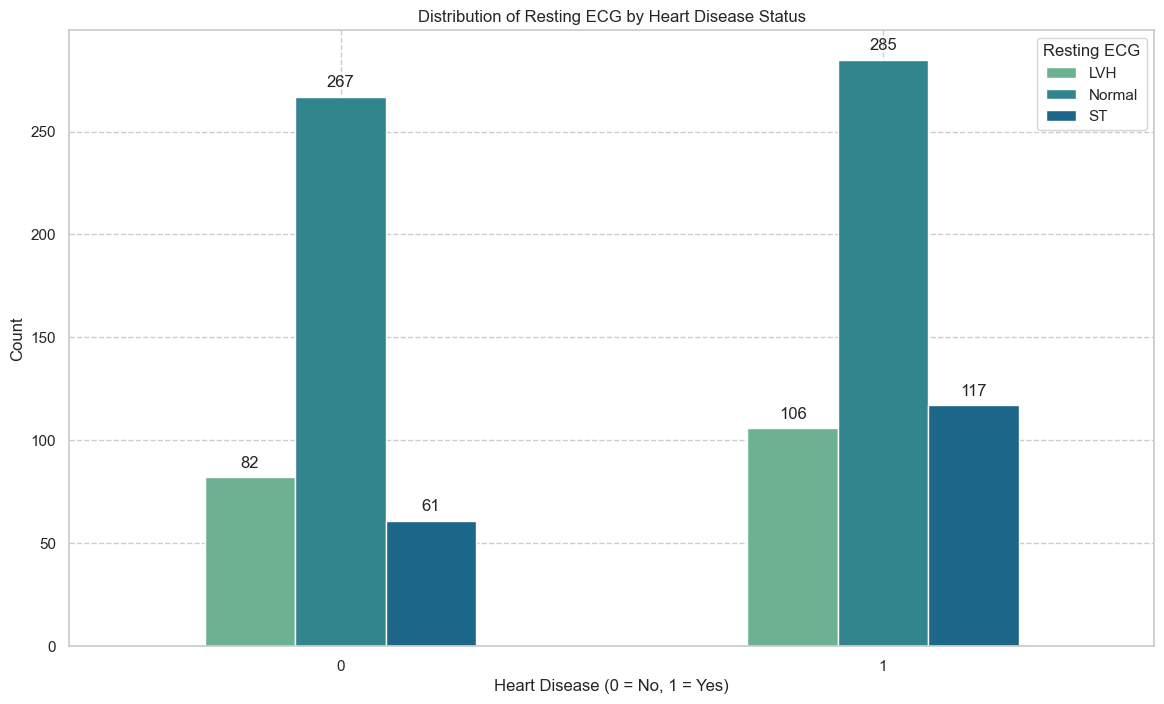

In [154]:
# Plotting the data directly from the grouped DataFrame
plt.figure(figsize=(14, 8))
count_restingecg_heart_disease.unstack().plot(kind='bar', color=colors_crest_extended, edgecolor='white', ax=plt.gca())

# Adding count labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points')

plt.title('Distribution of Resting ECG by Heart Disease Status')
plt.ylabel('Count')
plt.xlabel('Resting Ecg')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.legend(title='Resting ECG')
plt.xticks(rotation=0)
plt.show()


In [155]:
# Distribution of resting ecg vs heart disease in male and female(in which state of resting ecg people have heart disease.)

count_restingecg_disease_sex = df.groupby(['HeartDisease' , 'RestingECG','Sex'])['RestingECG'].agg('count')
count_restingecg_disease_sex

HeartDisease  RestingECG  Sex
0             LVH         F       33
                          M       49
              Normal      F       89
                          M      178
              ST          F       21
                          M       40
1             LVH         F       14
                          M       92
              Normal      F       29
                          M      256
              ST          F        7
                          M      110
Name: RestingECG, dtype: int64

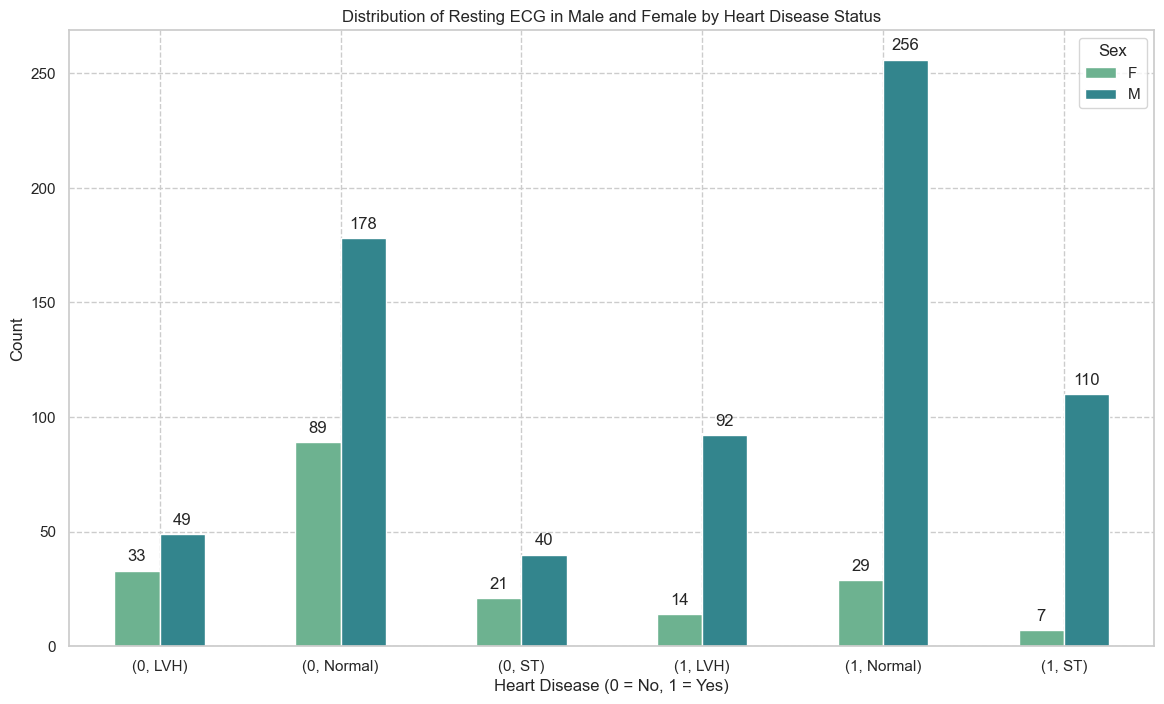

In [156]:
# Plotting  from the grouped DataFrame
plt.figure(figsize=(14, 8))
count_restingecg_disease_sex.unstack().plot(kind='bar', color=colors_crest_extended, edgecolor='white', ax=plt.gca())

# Adding count labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points')

plt.title('Distribution of Resting ECG in Male and Female by Heart Disease Status')
plt.ylabel('Count')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.legend(title='Sex')
plt.xticks(rotation=0)
plt.show()

#### Summary:

* Both men and women most commonly have a 'Normal' resting ECG.

* Overall, men have higher counts in all ECG categories than women.

* Men with heart disease show more 'ST' abnormalities , which could be indicative of underlying heart problems or stress on the heart. Monitoring these specific ECG changes could be vital for early detection and treatment in this demographic.


## 3.2.4 Distribution of Fasting BS 



#### Data Dictionary: FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]  (Given in assignment)


In [157]:
fastingbs_distribution= df['FastingBS'].value_counts()   # count of 0 and 1 in fasting bs
fastingbs_distribution

0    704
1    214
Name: FastingBS, dtype: int64

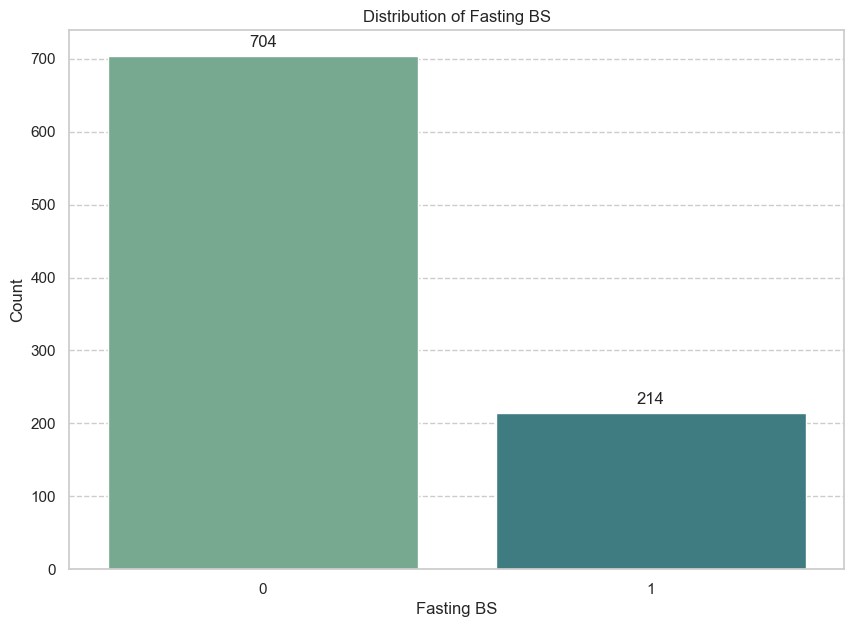

In [158]:
# Expanding the color palette to have four distinct colors from the crest palette
colors_crest_extended = [crest_palette(0.2), crest_palette(0.5), crest_palette(0.7), crest_palette(0.9)]

# Plotting the distribution of the 'Fast BS.
plt.figure(figsize=(10, 7))
ax = sns.barplot(y=fastingbs_distribution.values, x=fastingbs_distribution.index, palette=colors_crest_extended)

# Adding count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Distribution of Fasting BS')
plt.ylabel('Count')
plt.xlabel('Fasting BS')
plt.show()


Here 0 is normal and 1 is indicating that fasting BS is greater than 120 mg/dl.

In [159]:
# Distribution of FASTING BS vs heart disease

count_fastingbs_heart_disease = df.groupby(['HeartDisease' , 'FastingBS'])['FastingBS'].agg('count')
count_fastingbs_heart_disease

HeartDisease  FastingBS
0             0            366
              1             44
1             0            338
              1            170
Name: FastingBS, dtype: int64

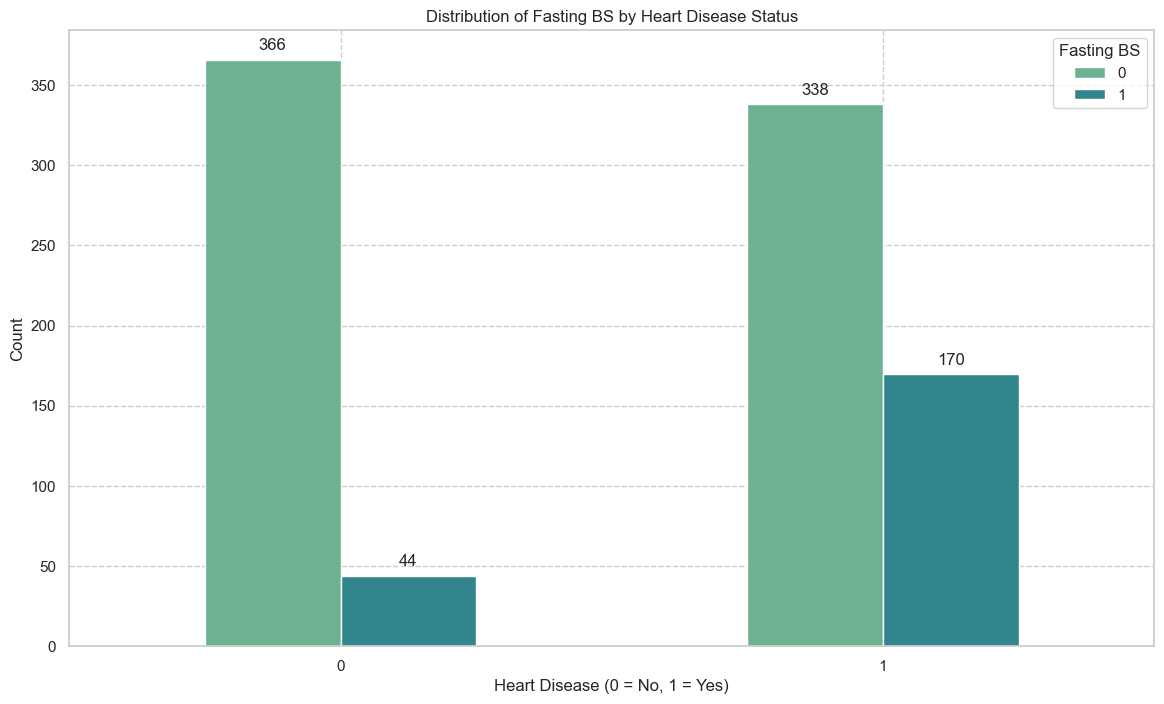

In [160]:
# Plotting the data directly from the grouped DataFrame
plt.figure(figsize=(14, 8))
count_fastingbs_heart_disease.unstack().plot(kind='bar', color=colors_crest_extended, edgecolor='white', ax=plt.gca())

# Adding count labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points')

plt.title('Distribution of Fasting BS by Heart Disease Status')
plt.ylabel('Count')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.legend(title='Fasting BS')
plt.xticks(rotation=0)
plt.show()


## 3.2.5 Distribution of ExerciseAngina

 exercise-induced angina [Y: Yes, N: No]

In [161]:
exercise_angina_distribution = df['ExerciseAngina'].value_counts()
exercise_angina_distribution

N    547
Y    371
Name: ExerciseAngina, dtype: int64

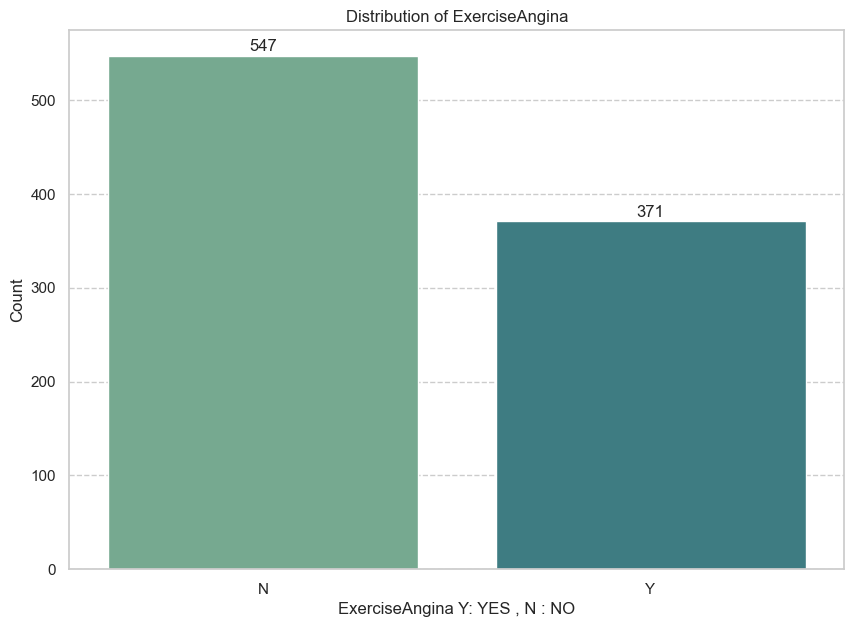

In [162]:

# Setting the color palette as specified
crest_palette = sns.color_palette("crest", as_cmap=True)

# Selecting two distinct colors from the crest palette
colors_crest = [crest_palette(0.2), crest_palette(0.9)]

# Replotting the distribution of heart disease by gender with numbers on the bars
plt.figure(figsize=(10,7))
ax = sns.barplot(y=exercise_angina_distribution.values, x=exercise_angina_distribution.index, palette=colors_crest_extended)

# Adding the count values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            int(height), 
            ha="center") 

plt.title('Distribution of ExerciseAngina')
plt.ylabel('Count')
plt.xlabel('ExerciseAngina Y: YES , N : NO')
plt.show()



In [163]:
# Distribution of ExerciseAngina vs heart disease

count_ExerciseAngina_heart_disease = df.groupby(['HeartDisease' , 'ExerciseAngina'])['ExerciseAngina'].agg('count')
count_ExerciseAngina_heart_disease

HeartDisease  ExerciseAngina
0             N                 355
              Y                  55
1             N                 192
              Y                 316
Name: ExerciseAngina, dtype: int64

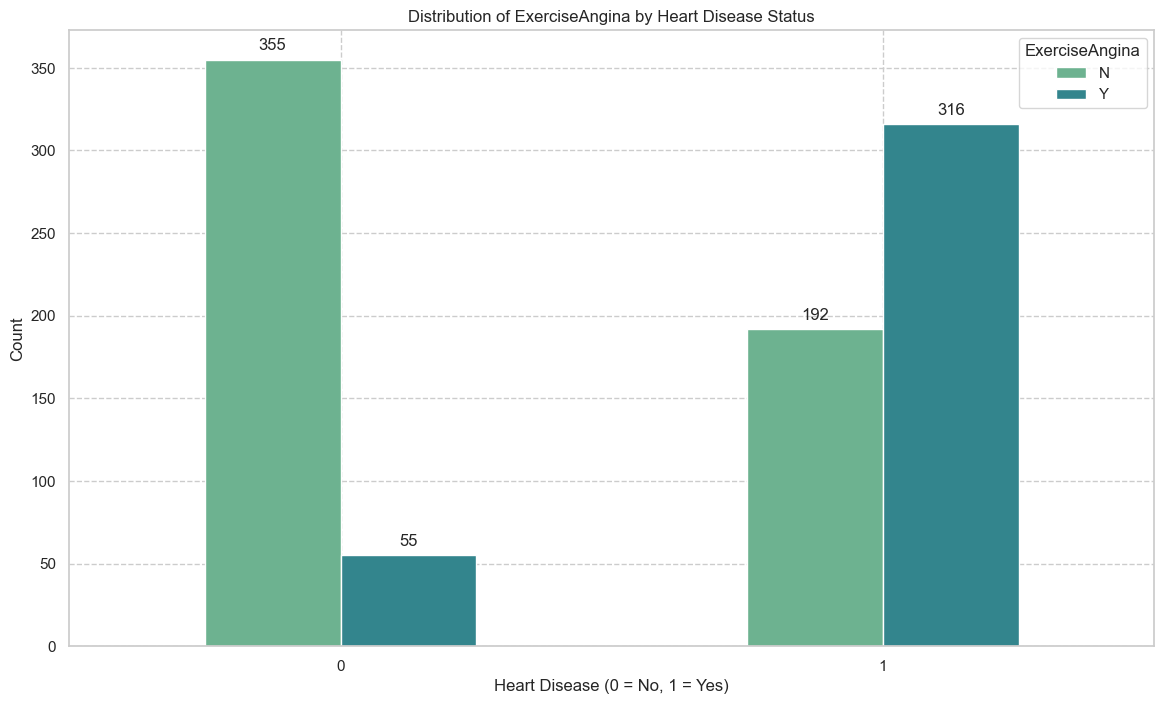

In [164]:
# Plotting the data directly from the grouped DataFrame
plt.figure(figsize=(14, 8))
count_ExerciseAngina_heart_disease.unstack().plot(kind='bar', color=colors_crest_extended, edgecolor='white', ax=plt.gca())

# Adding count labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points')

plt.title('Distribution of ExerciseAngina by Heart Disease Status')
plt.ylabel('Count')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.legend(title='ExerciseAngina')
plt.xticks(rotation=0)
plt.show()


## 3.2.6 Distribution of ST_Slope

In [165]:
dist_st_slope= df['ST_Slope'].value_counts()   # distribution of st slope 
dist_st_slope

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

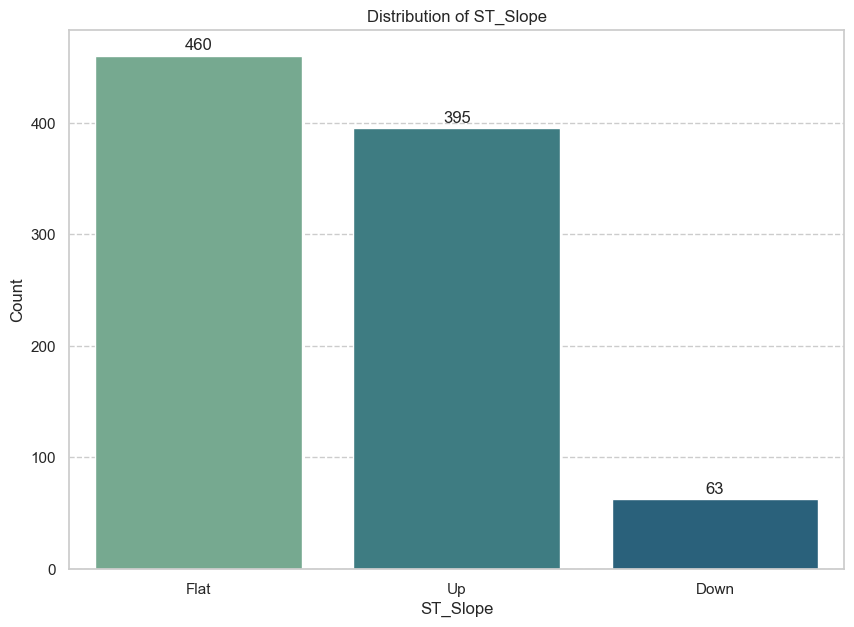

In [166]:
# Setting the color palette as specified
crest_palette = sns.color_palette("crest", as_cmap=True)

# Selecting two distinct colors from the crest palette
colors_crest = [crest_palette(0.2), crest_palette(0.9)]

# Replotting the distribution of heart disease by gender with numbers on the bars
plt.figure(figsize=(10,7))
ax = sns.barplot(y=dist_st_slope.values, x=dist_st_slope.index, palette=colors_crest_extended)

# Adding the count values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            int(height), 
            ha="center") 

plt.title('Distribution of ST_Slope')
plt.ylabel('Count')
plt.xlabel('ST_Slope')
plt.show()

In [167]:
# Distribution of ST_Slope vs heart disease

count_stslope_heart = df.groupby(['HeartDisease' , 'ST_Slope'])['ST_Slope'].agg('count')
count_stslope_heart

HeartDisease  ST_Slope
0             Down         14
              Flat         79
              Up          317
1             Down         49
              Flat        381
              Up           78
Name: ST_Slope, dtype: int64

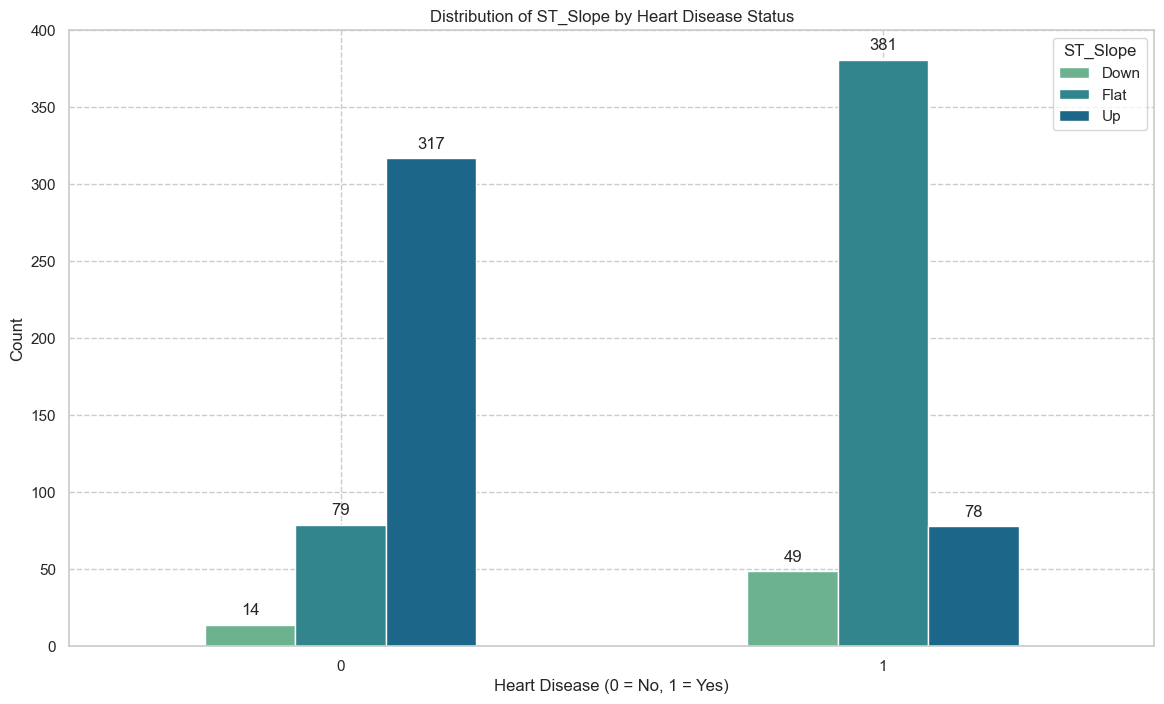

In [168]:
# Plotting the data directly from the grouped DataFrame
plt.figure(figsize=(14, 8))
count_stslope_heart.unstack().plot(kind='bar', color=colors_crest_extended, edgecolor='white', ax=plt.gca())

# Adding count labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 10), 
                       textcoords='offset points')

plt.title('Distribution of ST_Slope by Heart Disease Status')
plt.ylabel('Count')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.legend(title='ST_Slope')
plt.xticks(rotation=0)
plt.show()

## 3.3 Distribution of Heart disease of numerical columns.

In [169]:
def target_summary(dataframe, target, numerical_cols):
    """
    Returns a DataFrame with the mean of each numerical column grouped by the target variable.
    """
    print("DataFrame with the mean of each numerical column grouped by the target variable.")
    return df.groupby('HeartDisease')[numerical_cols].mean()



num_cols = ['Age' ,'RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']

# Get the summary
summary = target_summary(df, 'Outcome', num_cols)
summary


DataFrame with the mean of each numerical column grouped by the target variable.


Age   RestingBP  Cholesterol       MaxHR   Oldpeak
HeartDisease                                                          
0             50.551220  130.180488   238.682927  148.151220  0.408049
1             55.899606  134.440945   246.854331  127.655512  1.274213

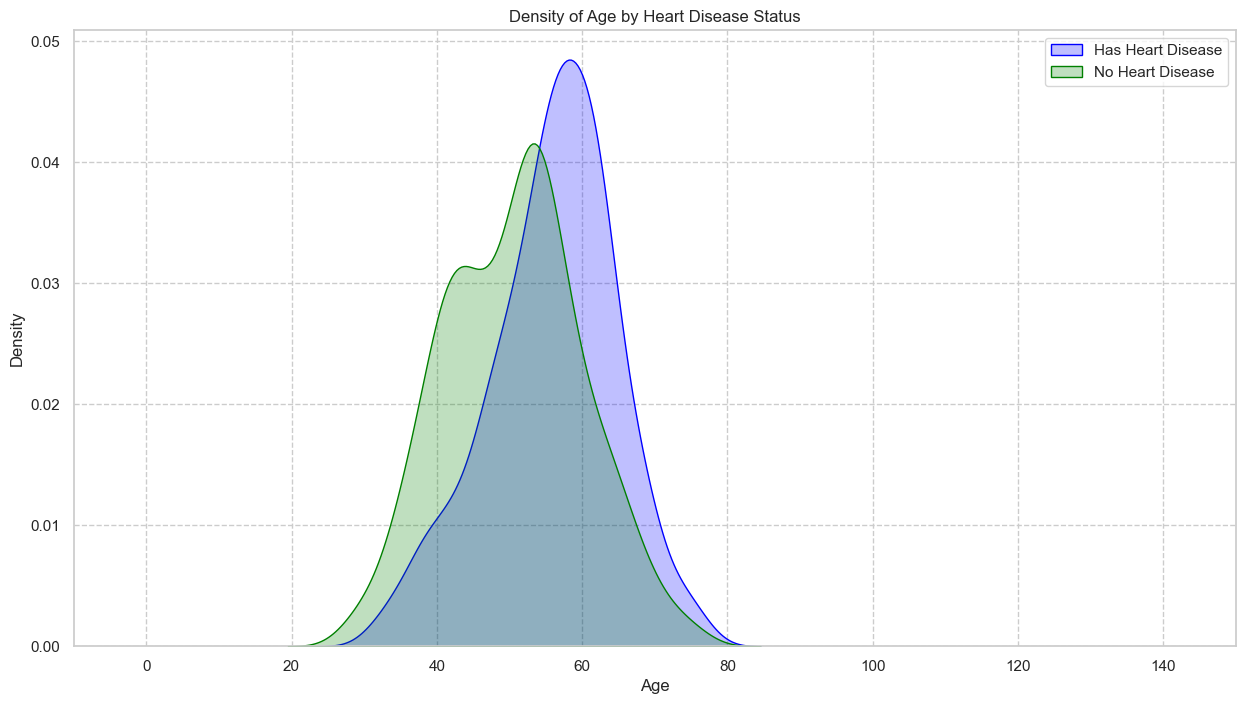

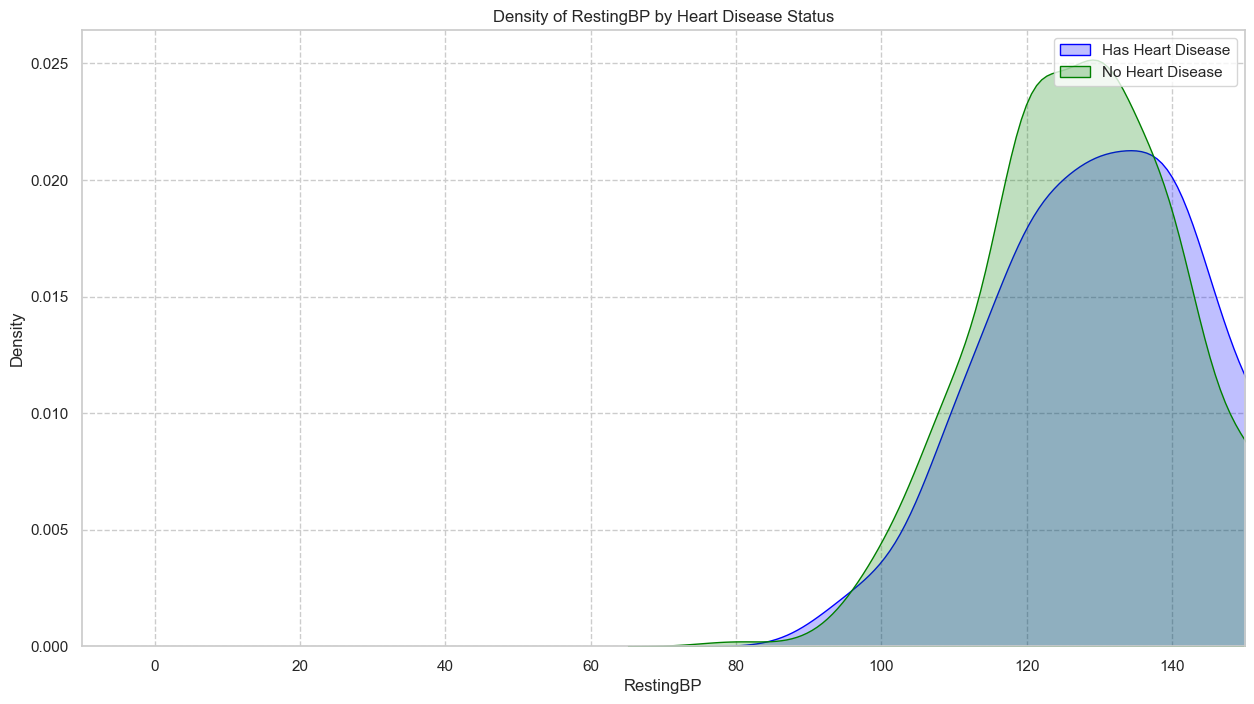

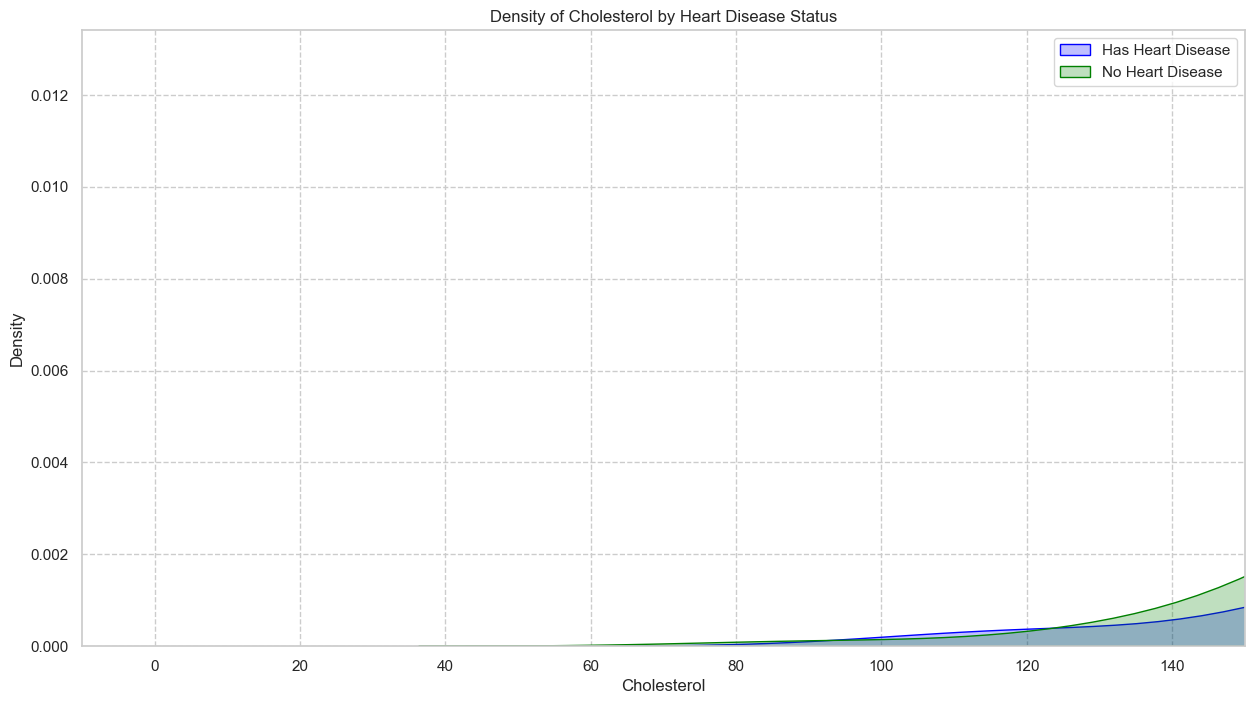

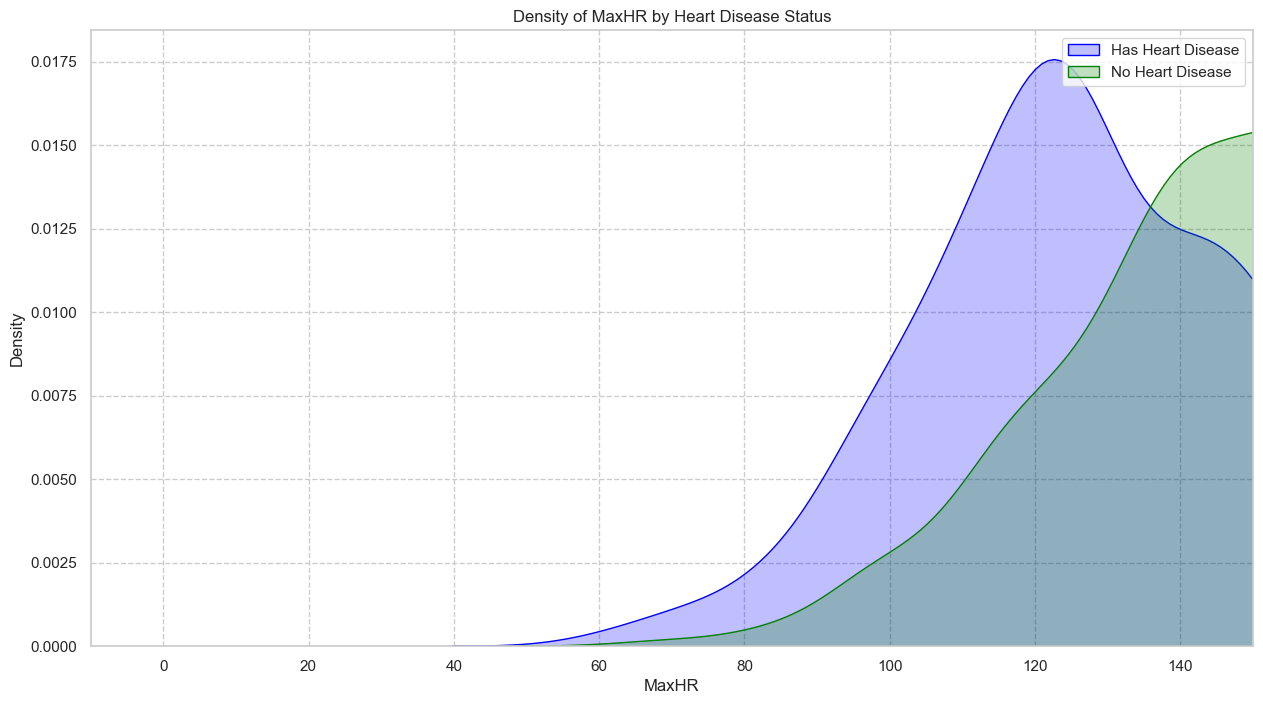

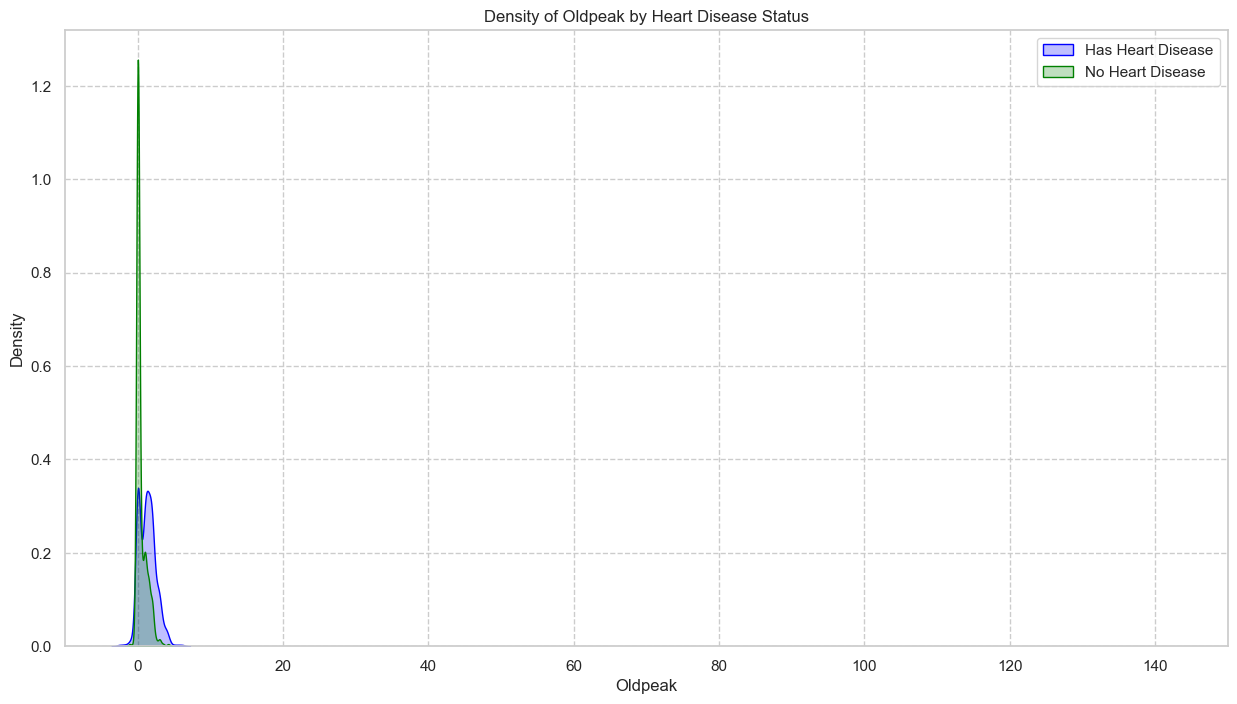

In [170]:
def target_density_est_with_num(dataframe, target, numerical_col):
    plt.figure(figsize=(15,8))
    
    # Define data for individuals with and without heart disease
    has_disease = dataframe[dataframe[target] == 1][numerical_col]
    no_disease = dataframe[dataframe[target] == 0][numerical_col]
    
    # Plotting density for individuals with heart disease
    sns.kdeplot(has_disease, color="blue", fill=True, label="Has Heart Disease")
    
    # Plotting density for individuals without heart disease
    sns.kdeplot(no_disease, color="green", fill=True, label="No Heart Disease")
    

    
    plt.xlim(-10, 150)  # Setting x-axis limits; adjust if needed
    plt.title(f"Density of {numerical_col} by Heart Disease Status")
    plt.legend(loc="upper right")  # Adding legend
    plt.show()


for col in num_cols:
    target_density_est_with_num(df, 'HeartDisease', col)


## Detecting Outlier:

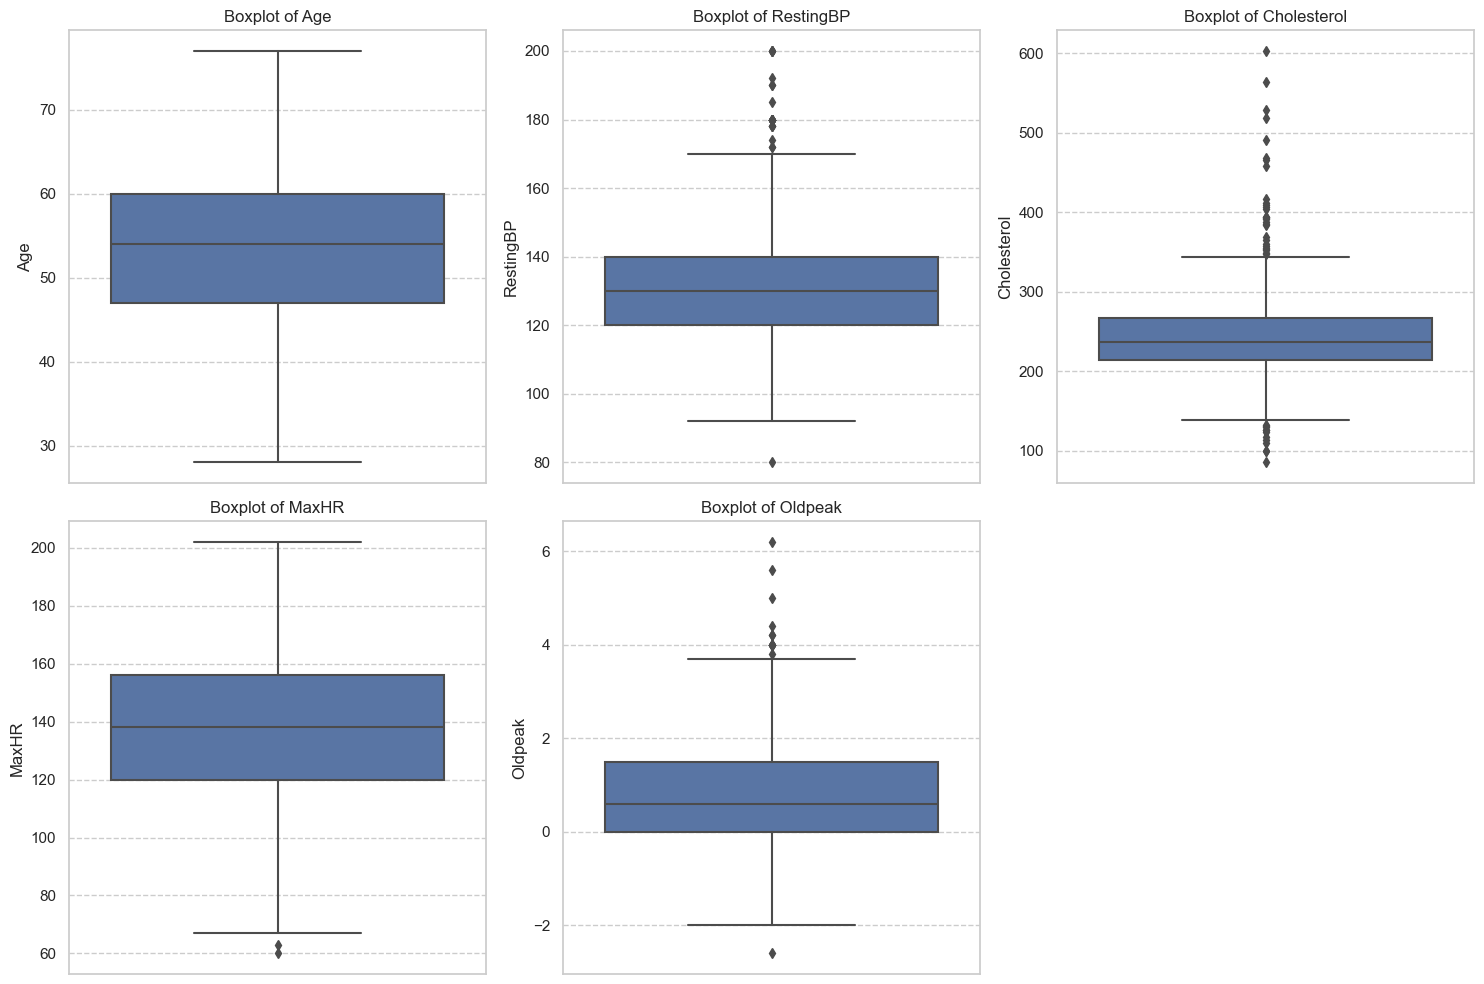

In [171]:

# List of numerical columns to analyze for outliers
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 10))

# Plotting boxplots for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()



#### Here are the box plots for the specified numerical columns.


* Age: The distribution seems fairly normal with no apparent outliers.
* RestingBP: There are a few values on the higher side that can be considered outliers.
* Cholesterol: There are a few values on the higher side that can be considered outliers.
* MaxHR: There are a few values on the lower sides that might be outliers.
* Oldpeak: There are some values on the higher side that can be considered outliers.

### Handling outliers

Define a Function about outlier threshold for data columns

In [172]:
def outlier_th(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

Define a Function about checking outlier for data columns

In [173]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_th(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

Define a Function about replace with threshold for data columns

In [174]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_th(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [175]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age False
RestingBP True
Cholesterol True
MaxHR True
Oldpeak True


In [176]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [177]:
for col in num_cols:
    print(col, check_outlier(df, col))

Age False
RestingBP False
Cholesterol False
MaxHR False
Oldpeak False


### Checking again outliers in box plot:

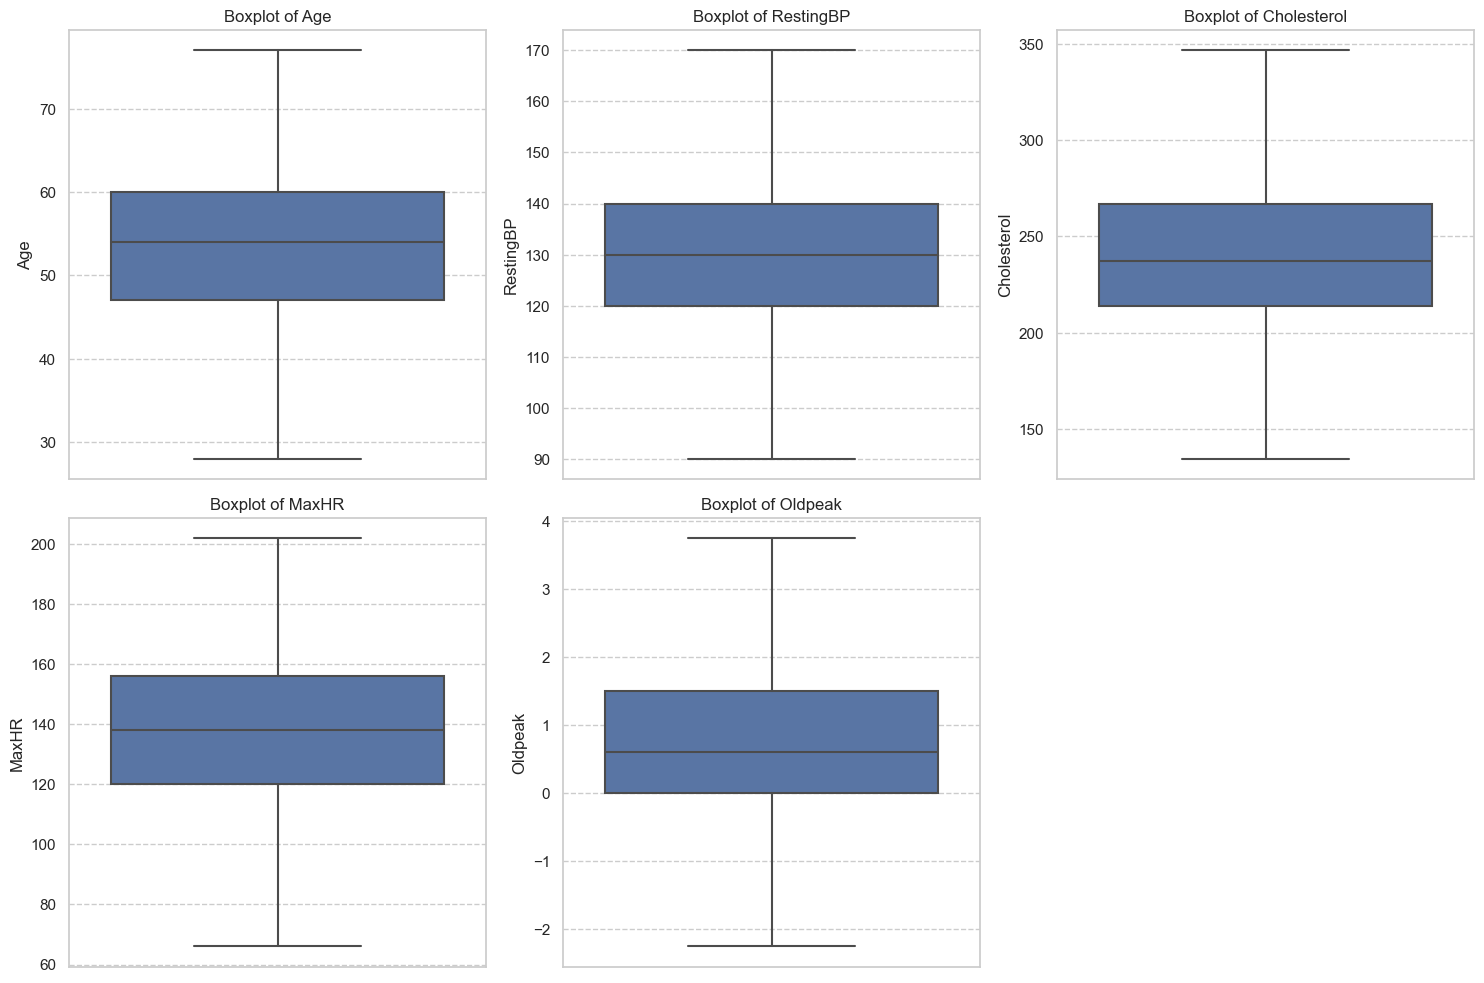

In [178]:

# List of numerical columns to analyze for outliers
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 10))

# Plotting boxplots for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

As, we can see that no more outlier is detected ...Finally we handle them correctly.

## Correlation

In [179]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_11600\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Age  RestingBP  Cholesterol     MaxHR   Oldpeak  \
Age           1.000000   0.271265     0.060299 -0.382449  0.262563   
RestingBP     0.271265   1.000000     0.092860 -0.111510  0.176594   
Cholesterol   0.060299   0.092860     1.000000  0.000687  0.071178   
MaxHR        -0.382449  -0.111510     0.000687  1.000000 -0.164927   
Oldpeak       0.262563   0.176594     0.071178 -0.164927  1.000000   
HeartDisease  0.282039   0.115885     0.083381 -0.400519  0.410211   

              HeartDisease  
Age               0.282039  
RestingBP         0.115885  
Cholesterol       0.083381  
MaxHR            -0.400519  
Oldpeak           0.410211  
HeartDisease      1.000000

C:\Users\HP\AppData\Local\Temp\ipykernel_11600\2983161070.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


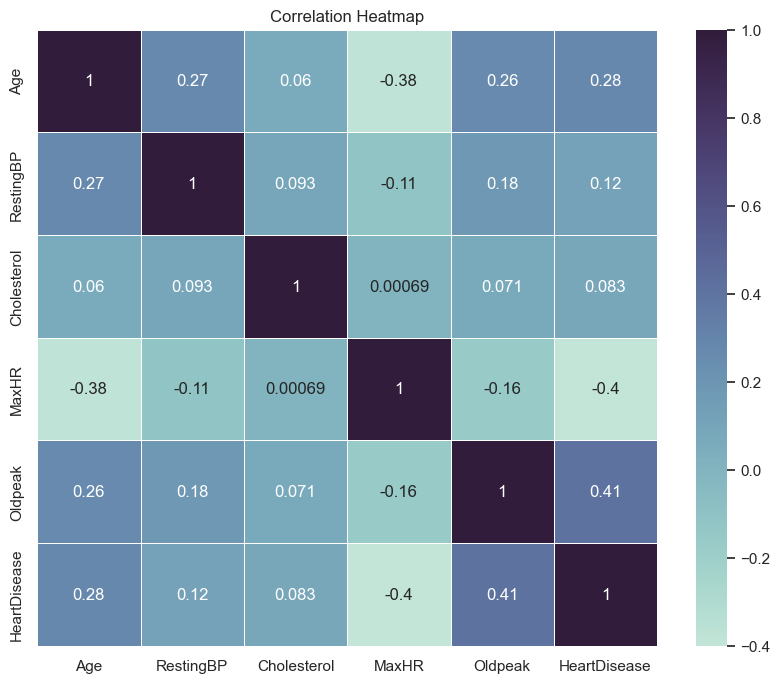

In [180]:

# Define the crest palette
crest_palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

# Calculate the correlation matrix
corr_matrix = df.corr()

# Using the "crest" palette for the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=crest_palette, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


* MaxHR (Maximum Heart Rate) has a strong negative correlation with HeartDisease, meaning higher MaxHR values tend to be associated with a lower likelihood of heart disease.

* Oldpeak has a strong positive correlation with HeartDisease, indicating that higher Oldpeak values tend to be associated with a higher likelihood of heart disease.

#### Step 4 : Features & Preparation

Your Dataset Specific Instructions for Feature Engineering > Assign some New Features to be Created

Next, we have data preparation based on data types:
- Categorical data: Transform Factors using one-hot encoding Technique
- Numerical data: Value Scaling Required?
- Date time data: extract months, days, weeks and years (If Applicable)

Perform transformation where you think you need to. 

You can create more features here in addition to above mandatory requirement!

In [181]:
## Insert your Code Here (You can insert more cells as needed to present in an understandable format, Each code block should have outcome)

## What Steps did you take please explain? Please Write Comment Below
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol FastingBS RestingECG  MaxHR  \
0  40.0   M           ATA        140        289.0         0     Normal    172   
1  49.0   F           NAP        160        180.0         0     Normal    156   
2  37.0   M           ATA        130        283.0         0         ST     98   
3  48.0   F           ASY        138        214.0         0     Normal    108   
4  54.0   M           NAP        150        195.0         0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

## 4.1 Categorical Data:

In [182]:
# One-hot encoding of categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Perform one-hot encoding without dropping the first category
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

# Display the first few rows after one-hot encoding
df_encoded.head()



C:\Users\HP\AppData\Local\Temp\ipykernel_11600\527635464.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)


Age  RestingBP  Cholesterol  MaxHR  Oldpeak  HeartDisease  Sex_F  Sex_M  \
0  40.0        140        289.0    172      0.0             0      0      1   
1  49.0        160        180.0    156      1.0             1      1      0   
2  37.0        130        283.0     98      0.0             0      0      1   
3  48.0        138        214.0    108      1.5             1      1      0   
4  54.0        150        195.0    122      0.0             0      0      1   

   ChestPainType_ASY  ChestPainType_ATA  ...  FastingBS_0  FastingBS_1  \
0                  0                  1  ...            1            0   
1                  0                  0  ...            1            0   
2                  0                  1  ...            1            0   
3                  1                  0  ...            1            0   
4                  0                  0  ...            1            0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                 0              0              0            1  
1                 0              0              1            0  
2                 0              0              0            1  
3                 1              0              1            0  
4                 0              0              0            1  

[5 rows x 22 columns]

In [183]:
df_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'FastingBS_0', 'FastingBS_1',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

## 4.2 Numerical data

In [184]:

# List of numerical columns to scale
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the first few rows after scaling
df_encoded.head()


Age  RestingBP  Cholesterol     MaxHR   Oldpeak  HeartDisease  Sex_F  \
0 -1.433140   0.462639     1.060551  1.384080 -0.851276             0      0   
1 -0.478484   1.644173    -1.359233  0.754610  0.118532             1      1   
2 -1.751359  -0.128128     0.927352 -1.527219 -0.851276             0      0   
3 -0.584556   0.344485    -0.604438 -1.133801  0.603436             1      1   
4  0.051881   1.053406    -1.026235 -0.583014 -0.851276             0      0   

   Sex_M  ChestPainType_ASY  ChestPainType_ATA  ...  FastingBS_0  FastingBS_1  \
0      1                  0                  1  ...            1            0   
1      0                  0                  0  ...            1            0   
2      1                  0                  1  ...            1            0   
3      0                  1                  0  ...            1            0   
4      1                  0                  0  ...            1            0   

   RestingECG_LVH  RestingECG_Normal  RestingECG_ST  ExerciseAngina_N  \
0               0                  1              0                 1   
1               0                  1              0                 1   
2               0                  0              1                 1   
3               0                  1              0                 0   
4               0                  1              0                 1   

   ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  ST_Slope_Up  
0                 0              0              0            1  
1                 0              0              1            0  
2                 0              0              0            1  
3                 1              0              1            0  
4                 0              0              0            1  

[5 rows x 22 columns]

#### Step 5 : Feature Selection

For selecting features, we need features that are least correlated amongst themselves but have a good correlation with our predictor (y) variable. Check out correlations plot and see which works. 

In [185]:
## Insert your Code Here (You can insert more cells as needed to present in an understandable format, Each code block should have outcome)

## Which Features did you Un-Select? Please Write Comment Below
df_encoded.corr()

Age  RestingBP  Cholesterol     MaxHR   Oldpeak  \
Age                1.000000   0.271265     0.060299 -0.382449  0.262563   
RestingBP          0.271265   1.000000     0.092860 -0.111510  0.176594   
Cholesterol        0.060299   0.092860     1.000000  0.000687  0.071178   
MaxHR             -0.382449  -0.111510     0.000687  1.000000 -0.164927   
Oldpeak            0.262563   0.176594     0.071178 -0.164927  1.000000   
HeartDisease       0.282039   0.115885     0.083381 -0.400519  0.410211   
Sex_F             -0.055750  -0.017939     0.110396  0.189197 -0.112159   
Sex_M              0.055750   0.017939    -0.110396 -0.189197  0.112159   
ChestPainType_ASY  0.166607   0.042516     0.077412 -0.355002  0.281977   
ChestPainType_ATA -0.218165  -0.055819     0.004032  0.253832 -0.266506   
ChestPainType_NAP -0.011335  -0.027489    -0.074243  0.134524 -0.104849   
ChestPainType_TA   0.032042   0.055228    -0.042835  0.100048  0.033035   
FastingBS_0       -0.198039  -0.064666    -0.020012  0.131797 -0.059230   
FastingBS_1        0.198039   0.064666     0.020012 -0.131797  0.059230   
RestingECG_LVH     0.145727   0.049317     0.090745  0.125738  0.084891   
RestingECG_Normal -0.230566  -0.113980    -0.056496  0.024142 -0.115397   
RestingECG_ST      0.136798   0.090820    -0.022658 -0.158244  0.056264   
ExerciseAngina_N  -0.215793  -0.153743    -0.095097  0.370892 -0.418709   
ExerciseAngina_Y   0.215793   0.153743     0.095097 -0.370892  0.418709   
ST_Slope_Down      0.138397  -0.017217    -0.013230 -0.073502  0.307755   
ST_Slope_Flat      0.185568   0.113949     0.078330 -0.342834  0.298174   
ST_Slope_Up       -0.258067  -0.106282    -0.072347  0.383747 -0.458263   

                   HeartDisease     Sex_F     Sex_M  ChestPainType_ASY  \
Age                    0.282039 -0.055750  0.055750           0.166607   
RestingBP              0.115885 -0.017939  0.017939           0.042516   
Cholesterol            0.083381  0.110396 -0.110396           0.077412   
MaxHR                 -0.400519  0.189197 -0.189197          -0.355002   
Oldpeak                0.410211 -0.112159  0.112159           0.281977   
HeartDisease           1.000000 -0.305445  0.305445           0.516716   
Sex_F                 -0.305445  1.000000 -1.000000          -0.183876   
Sex_M                  0.305445 -1.000000  1.000000           0.183876   
ChestPainType_ASY      0.516716 -0.183876  0.183876           1.000000   
ChestPainType_ATA     -0.401924  0.161522 -0.161522          -0.522432   
ChestPainType_NAP     -0.212964  0.066486 -0.066486          -0.577670   
ChestPainType_TA      -0.054790  0.004031 -0.004031          -0.249003   
FastingBS_0           -0.267291  0.120076 -0.120076          -0.131176   
FastingBS_1            0.267291 -0.120076  0.120076           0.131176   
RestingECG_LVH         0.010670  0.049518 -0.049518           0.002289   
RestingECG_Normal     -0.091580  0.010634 -0.010634          -0.063606   
RestingECG_ST          0.102527 -0.063715  0.063715           0.076438   
ExerciseAngina_N      -0.494282  0.190664 -0.190664          -0.430034   
ExerciseAngina_Y       0.494282 -0.190664  0.190664           0.430034   
ST_Slope_Down          0.122527 -0.066036  0.066036           0.103407   
ST_Slope_Flat          0.554134 -0.116077  0.116077           0.303645   
ST_Slope_Up           -0.622164  0.150942 -0.150942          -0.359443   

                   ChestPainType_ATA  ...  FastingBS_0  FastingBS_1  \
Age                        -0.218165  ...    -0.198039     0.198039   
RestingBP                  -0.055819  ...    -0.064666     0.064666   
Cholesterol                 0.004032  ...    -0.020012     0.020012   
MaxHR                       0.253832  ...     0.131797    -0.131797   
Oldpeak                    -0.266506  ...    -0.059230     0.059230   
HeartDisease               -0.401924  ...    -0.267291     0.267291   
Sex_F                       0.161522  ...     0.120076    -0.120076   
Sex_M                      

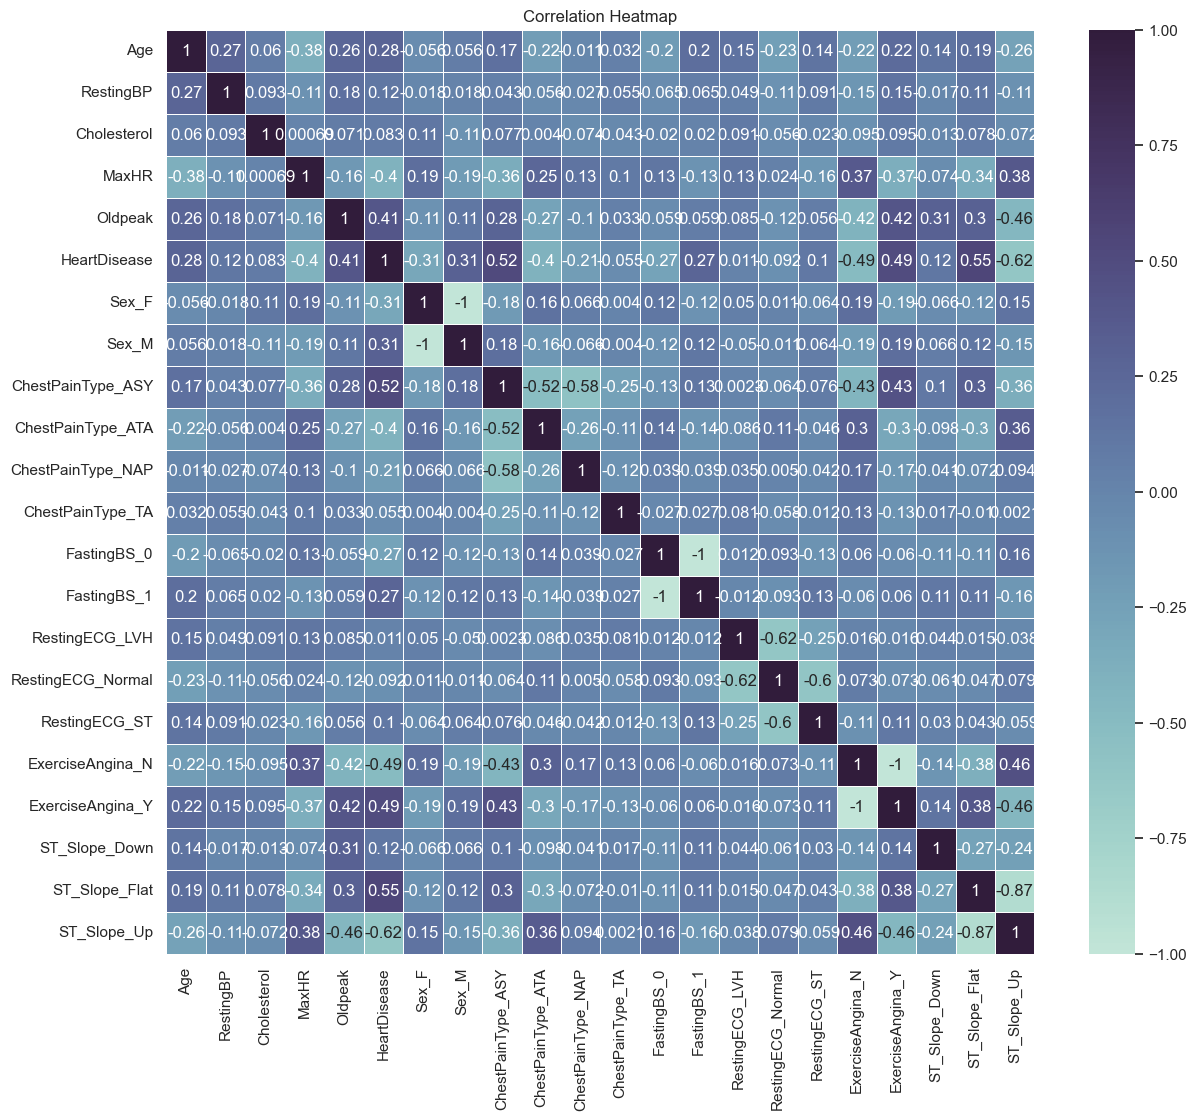

In [186]:

# Define the crest palette
crest_palette = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Using the "crest" palette for the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap=crest_palette, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Creating Model

In [187]:
y = df_encoded["HeartDisease"]                   # Outcome variable
X = df_encoded.drop(["HeartDisease"], axis=1)    # features selected

#### Step 6 : Splitting Data for Evaluation 

Split the Data in three Parts
- Train for Initial Selection
- Val for Validation & Optimization
- Test for Evaluating Performance in Real World

In [188]:
## Insert your Code Here (You can insert more cells as needed to present in an understandable format, Each code block should have outcome)

## How did you decide the split percentage? Please Write Comment Below


# Splitting the data into training and testing sets:
# X represents the feature matrix and y represents the target variable.
# test_size=0.30 ensures that 30% of the data is used for testing, while the remaining 70% is used for training.
# random_state=17 is used for reproducibility. This means that every time the code is run, the data will be split in the same way.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

I split my data into 70 , 30 ratio.

#### Step 7 : Model Building 

Use 3 Models : SVC, Logistic Regression and Random Forest to train upon your dataset and create a classifier object

In [189]:
## Insert your Code Here (You can insert more cells as needed to present in an understandable format, Each code block should have outcome)

## Make sure you create 3 objects so you can compare them in the next steps.



#### Svc:

In [190]:
from sklearn.svm import SVC
svc = SVC(random_state=46)
svc.fit(X_train, y_train)


SVC(random_state=46)


#### Logistic Regression:

In [191]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=46)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=46)

#### Random Forest:

In [192]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=46)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=46)

#### Step 8 : Model Evaluation

Present your Outcome Classification Reports of Each Model Performance including below

- Accuracy & Confusion Matrix
- Precision or Recall (What you will Select?)

In [193]:
## Insert your Code Here (You can insert more cells as needed to present in an understandable format, Each code block should have outcome)

## Which Model Peformed Well According to You, What Metric did you rely to make decision? Please Write Comment Below

from sklearn.metrics import accuracy_score, confusion_matrix

# For SVC
svc_pred = svc.predict(X_test)
#print(svc_pred)                                       # Here we can see wht the models predicts
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_confusion = confusion_matrix(y_test, svc_pred)

# For Logistic Regression
logreg_pred = log_reg.predict(X_test)
#print(logreg_pred)                                   # Here we can see wht the models predicts
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_confusion = confusion_matrix(y_test, logreg_pred)

# For Random Forest
random_forest_pred = random_forest.predict(X_test)
#print(random_forest_pred)                             # Here we can see wht the models predicts
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_confusion = confusion_matrix(y_test, random_forest_pred)


#### Svc:

In [194]:
print("SVC Accuracy : " , svc_accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, svc_pred).ravel()

print("\nTrue Positive = ", tp)
print("True Negative = ", tn)
print("False Positive = ", fp)
print("False Negative = ", fn)

SVC Accuracy :  0.8768115942028986

True Positive =  134
True Negative =  108
False Positive =  24
False Negative =  10


According to my data dictionary:

#### HeartDisease: output class [1: heart disease, 0: Normal]

In [195]:
from sklearn.metrics import classification_report
target_names = ['Normal', 'Heart Disease']   # labeling according to my data dict
print(classification_report(y_test, svc_pred, target_names=target_names))

               precision    recall  f1-score   support

       Normal       0.92      0.82      0.86       132
Heart Disease       0.85      0.93      0.89       144

     accuracy                           0.88       276
    macro avg       0.88      0.87      0.88       276
 weighted avg       0.88      0.88      0.88       276



#### Logistic Regression:

In [196]:
print("Logistic Regression : " , logreg_accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, logreg_pred).ravel()

print("\nTrue Positive = ", tp)
print("True Negative = ", tn)
print("False Positive = ", fp)
print("False Negative = ", fn)

Logistic Regression :  0.8586956521739131

True Positive =  130
True Negative =  107
False Positive =  25
False Negative =  14


In [197]:
from sklearn.metrics import classification_report
target_names = ['Normal', 'Heart Disease']   # labeling according to my data dict
print(classification_report(y_test, logreg_pred, target_names=target_names))

               precision    recall  f1-score   support

       Normal       0.88      0.81      0.85       132
Heart Disease       0.84      0.90      0.87       144

     accuracy                           0.86       276
    macro avg       0.86      0.86      0.86       276
 weighted avg       0.86      0.86      0.86       276



#### Random Forest:

In [198]:
print("Random Forest : " , random_forest_accuracy)

tn, fp, fn, tp = confusion_matrix(y_test, random_forest_pred).ravel()

print("\nTrue Positive = ", tp)
print("True Negative = ", tn)
print("False Positive = ", fp)
print("False Negative = ", fn)

Random Forest :  0.8695652173913043

True Positive =  134
True Negative =  106
False Positive =  26
False Negative =  10


In [199]:
from sklearn.metrics import classification_report
target_names = ['Normal', 'Heart Disease']   # labeling according to my data dict
print(classification_report(y_test, random_forest_pred, target_names=target_names))

               precision    recall  f1-score   support

       Normal       0.91      0.80      0.85       132
Heart Disease       0.84      0.93      0.88       144

     accuracy                           0.87       276
    macro avg       0.88      0.87      0.87       276
 weighted avg       0.87      0.87      0.87       276



#### Which ever model brings Best (Precision or Recall) per your Opinion move forward it to next step

* SVC Accuracy :  0.8768115942028986

* Logistic Regression :  0.8586956521739131

* Random Forest :  0.8695652173913043

+++++++++++++++++++++++++++++++++++++++++++++

* Svc (recall) :  0.93

* Logistic Regression(recall)  : 0.90 

* Random Forest (recall) :  0.93 

Based on the importance of correctly identifying patients with heart disease and minimizing the risk of missing any positive cases,Both the SVC and Random Forest models performed well, with a focus on the 'recall' metric  . Given that they both achieved a 93% recall rate,  I believe either of these models could be the best choice.

### Features that are important:

By using random forest feature imporatnce i am exploring which features are more important for my model and which are least important.

In [200]:

random_forest.fit(X_train, y_train)

# Get feature importances
importances = random_forest.feature_importances_

# For better visualization, you can sort them and maybe plot them
sorted_indices = importances.argsort()[::-1]
importance_sorted = importances[sorted_indices]
features_sorted = X.columns[sorted_indices]

# Print out feature importances
for feature, importance in zip(features_sorted, importance_sorted):
    print(f"{feature}: {importance}")


ST_Slope_Up: 0.13807629274401792
Oldpeak: 0.11653629102293832
ST_Slope_Flat: 0.09335009448788684
ChestPainType_ASY: 0.09164828055637193
MaxHR: 0.0821841881793577
Cholesterol: 0.0755532866567007
Age: 0.07446224956691005
RestingBP: 0.06471221132655403
ExerciseAngina_Y: 0.04753188568185183
ExerciseAngina_N: 0.03963242890235999
ChestPainType_ATA: 0.02686160071641917
FastingBS_0: 0.02539750433637733
Sex_M: 0.019527028867119607
FastingBS_1: 0.019138287407162557
RestingECG_LVH: 0.01886159045573447
Sex_F: 0.01703512763448911
ChestPainType_NAP: 0.013901298761891813
RestingECG_Normal: 0.012348350630568081
RestingECG_ST: 0.009456499487217055
ST_Slope_Down: 0.0071898316018739325
ChestPainType_TA: 0.006595670976197712


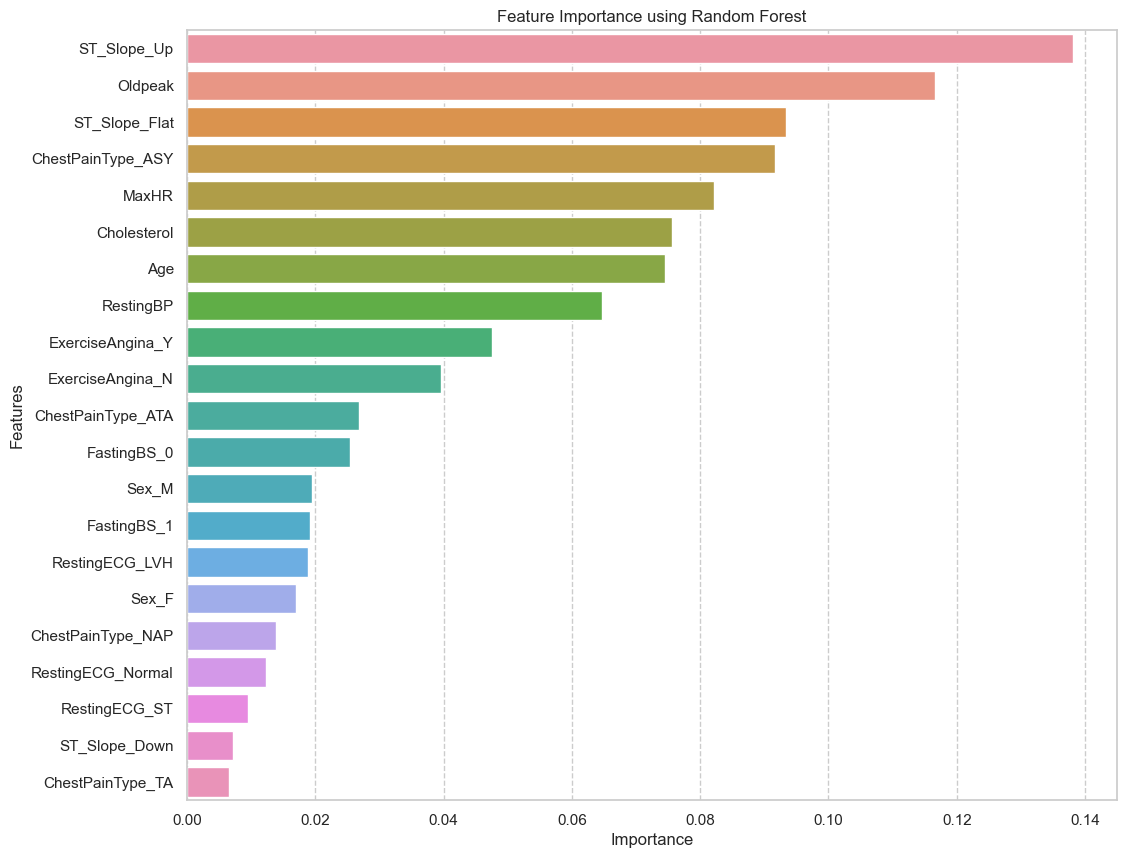

In [201]:

# Sorting the features based on importance
sorted_idx = sorted(range(len(importance_sorted)), key=lambda k: importance_sorted[k], reverse=True)
features_sorted = [features_sorted[i] for i in sorted_idx]
importance_sorted = [importance_sorted[i] for i in sorted_idx]

# Plotting
plt.figure(figsize=(12, 10))
sns.barplot(x=importance_sorted, y=features_sorted)
plt.title("Feature Importance using Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


## Conclusion:

#### The model gives high importance to features related to the ST slope ,Old peak, chest pain types, and exercise-induced parameters. Traditional risk factors like cholesterol, age, and resting blood pressure also play significant roles. It's essential to consider these features prominently when assessing heart disease risk. However, every feature provides some level of contribution to the overall prediction, and their combined effect helps in achieving a more accurate model.

#### Step 9 : Model Tuning & Validation

Now check how your model in K-Cross Fold Validation! - Tune your model and tweak model parameters from Last Step to find the right configuration

In [202]:
## Insert your Code Here (You can insert more cells as needed to present in an understandable format, Each code block should have outcome)

## What Configuration Parameters did you optimize in this step? Please Write Comment Below

from sklearn.model_selection import cross_val_score

svc_scores = cross_val_score(svc, X, y, cv=5)
lr_scores = cross_val_score(log_reg, X, y, cv=5)
rf_scores = cross_val_score(random_forest, X, y, cv=5)

print("SVC Average Score:", svc_scores.mean())
print("Logistic Regression Average Score:", lr_scores.mean())
print("Random Forest Average Score:", rf_scores.mean())


SVC Average Score: 0.8430684248039914
Logistic Regression Average Score: 0.8376217628890472
Random Forest Average Score: 0.8288904727963887


### Cross-Validation Model Performance:

#### Support Vector Classifier (SVC):

Average Accuracy: 84.31%
#### Interpretation: 
The SVC achieved the highest average accuracy among the three models, suggesting it's the most consistent in its predictions across different data splits. This indicates that SVC has managed to find patterns in the data that are generalizable across different subsets of the data.


#### Logistic Regression:

Average Accuracy: 83.76%
#### Interpretation:
Logistic Regression closely follows the SVC in terms of performance. An accuracy of 83.76% suggests that the linear decision boundary formed by logistic regression is also fairly effective at distinguishing between the classes.


#### Random Forest:

Average Accuracy: 82.89%
#### Interpretation: 
The Random Forest model has an average accuracy that's slightly lower than the other two models. However, it's worth noting that Random Forest models offer a level of interpretability via feature importances, which can be valuable in understanding which features are driving the predictions.

### Hyper parameter tuning:

### for svc:

In [203]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Initialize the SVC model
svc = SVC(random_state=46)

# Parameters for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}

grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5)
grid_search_svc.fit(X_train, y_train)

best_svc = grid_search_svc.best_estimator_


### for logistic regression:

In [204]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=10000, random_state=46)

# Parameters for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

best_lr = grid_search_lr.best_estimator_


### for random forest:

In [205]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=46)

# Parameters for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6]
}


grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_


## Evaluate the tuned model:

In [206]:
# Evaluate SVC on training data
svc_train_score = best_svc.score(X_train, y_train)

# Evaluate Logistic Regression on training data
lr_train_score = best_lr.score(X_train, y_train)

# Evaluate Random Forest on training data
rf_train_score = best_rf.score(X_train, y_train)

print("Tuned SVC Training Accuracy:", svc_train_score)
print("Tuned LR Training Accuracy:", lr_train_score)
print("Tuned RF Training Accuracy:", rf_train_score)


Tuned SVC Training Accuracy: 0.8707165109034268
Tuned LR Training Accuracy: 0.8613707165109035
Tuned RF Training Accuracy: 0.9485981308411215


#### Step 10 : Testing the Model

Now use Test Dataset using Predict Function and Validated the correctness of Outcome

Did it perform well? Share Classification Report based on Test Dataset

### I a here testing my hyper parameter tuned models of svc , logistic regression and random forest.

In [207]:
## Insert your Code Here (You can insert more cells as needed to present in an understandable format, Each code block should have outcome)

## Did the model pass the real world test, What is your threshold of acceptability? Please Write Comment Below

svc_test_score = best_svc.score(X_test, y_test)
print("Tuned SVC Test Accuracy:", svc_test_score)

lr_test_score = best_lr.score(X_test, y_test)
print("Tuned LR Test Accuracy:", lr_test_score)

rf_test_score = best_rf.score(X_test, y_test)
print("Tuned RF Test Accuracy:", rf_test_score)



Tuned SVC Test Accuracy: 0.8623188405797102
Tuned LR Test Accuracy: 0.8659420289855072
Tuned RF Test Accuracy: 0.8695652173913043


## Conclusion:

### SVC (Support Vector Classifier)

#### Training Accuracy: 87.07%
#### Test Accuracy: 86.23%
The SVC model seems to be performing effectively on the training 87.07% and test datasets with the accuracy 86%. With such consistent results, this model appears to be a reliable choice for making predictions on similar datasets in the future.

### Logistic Regression (LR)

#### Training Accuracy: 86.13%
#### Test Accuracy: 86.59%
The LR model had a training accuracy of 86.13% and a test accuracy of 86.59%. The test accuracy being slightly higher than the training accuracy is a good sign. It indicates that the model is not overfitting and is doing a consistent job in predictions.

### Random Forest (RF)

#### Training Accuracy: 94.85%
#### Test Accuracy: 86.96%
The RF model showed a high training accuracy of 94.85%. However, its test accuracy was 86.96%. While the test accuracy is slightly higher than the other two models, the difference between training and test accuracy is notable. This suggests that the model might be overfitting to the training data.

### In Conclusion:
All three models have shown good performance on the test data. The RF model, despite its high training accuracy, didn't outperform the others by much on the test data. SVC and LR have closer training and test accuracies, suggesting they might be more robust.

#### Step 11 : Interpretation & Learning

Create a Feature Importantance Visualization and Interpret in words about what are you findings?

In [208]:
## Insert your Code Here (You can insert more cells as needed to present in an understandable format, Each code block should have outcome)

## What are the important Features your model thinks? Please Write Comment Below
def print_coefficients_or_importance(model, features, model_name):
    if hasattr(model, 'feature_importances_'):  # For tree-based models
        values = model.feature_importances_
    elif hasattr(model, 'coef_'):  # For models like Logistic Regression and linear SVC
        values = model.coef_[0]
    else:
        print(f"{model_name} does not have feature importances or coefficients.")
        return

    feature_df = pd.DataFrame({'Value': values, 'Feature': features.columns}).sort_values(by="Value",ascending=False)
    
    print(f"\n{model_name} - Feature Importance/Coef:\n")
    for idx, row in feature_df.iterrows():
        print(f"{row['Feature']}: {row['Value']}")
    print("-" * 50)

# Models and their names
models = {
    "SVC": best_svc,
    "Logistic Regression": best_lr,
    "Random Forest": best_rf
}

for model_name, model in models.items():
    print_coefficients_or_importance(model, X_train, model_name)




SVC - Feature Importance/Coef:

ST_Slope_Flat: 0.8388388929149073
ChestPainType_ASY: 0.6328239395554647
FastingBS_1: 0.5171030662412477
Sex_M: 0.4840034858193576
Oldpeak: 0.3907741051025653
ExerciseAngina_Y: 0.2655660682528378
Cholesterol: 0.1937528407755309
Age: 0.17079923238678418
RestingECG_Normal: 0.08282745747362696
RestingECG_ST: 0.04315716827213123
ST_Slope_Down: 0.0
RestingBP: -0.01957325970855095
MaxHR: -0.032748582998209486
ChestPainType_TA: -0.056513421189833934
RestingECG_LVH: -0.12598462574578662
ChestPainType_NAP: -0.15232182768954772
ExerciseAngina_N: -0.2655660682528378
ChestPainType_ATA: -0.4239886906759125
Sex_F: -0.4840034858192439
FastingBS_0: -0.517103066241134
ST_Slope_Up: -0.8388388929147368
--------------------------------------------------

Logistic Regression - Feature Importance/Coef:

ChestPainType_ASY: 0.8802915408938653
ST_Slope_Flat: 0.7719868824963741
FastingBS_1: 0.4996192007087536
Sex_M: 0.46724022003009635
Oldpeak: 0.4655483938927375
ExerciseAngina_Y

[ 0.17079923 -0.01957326  0.19375284 -0.03274858  0.39077411 -0.48400349
  0.48400349  0.63282394 -0.42398869 -0.15232183 -0.05651342 -0.51710307
  0.51710307 -0.12598463  0.08282746  0.04315717 -0.26556607  0.26556607
  0.          0.83883889 -0.83883889]


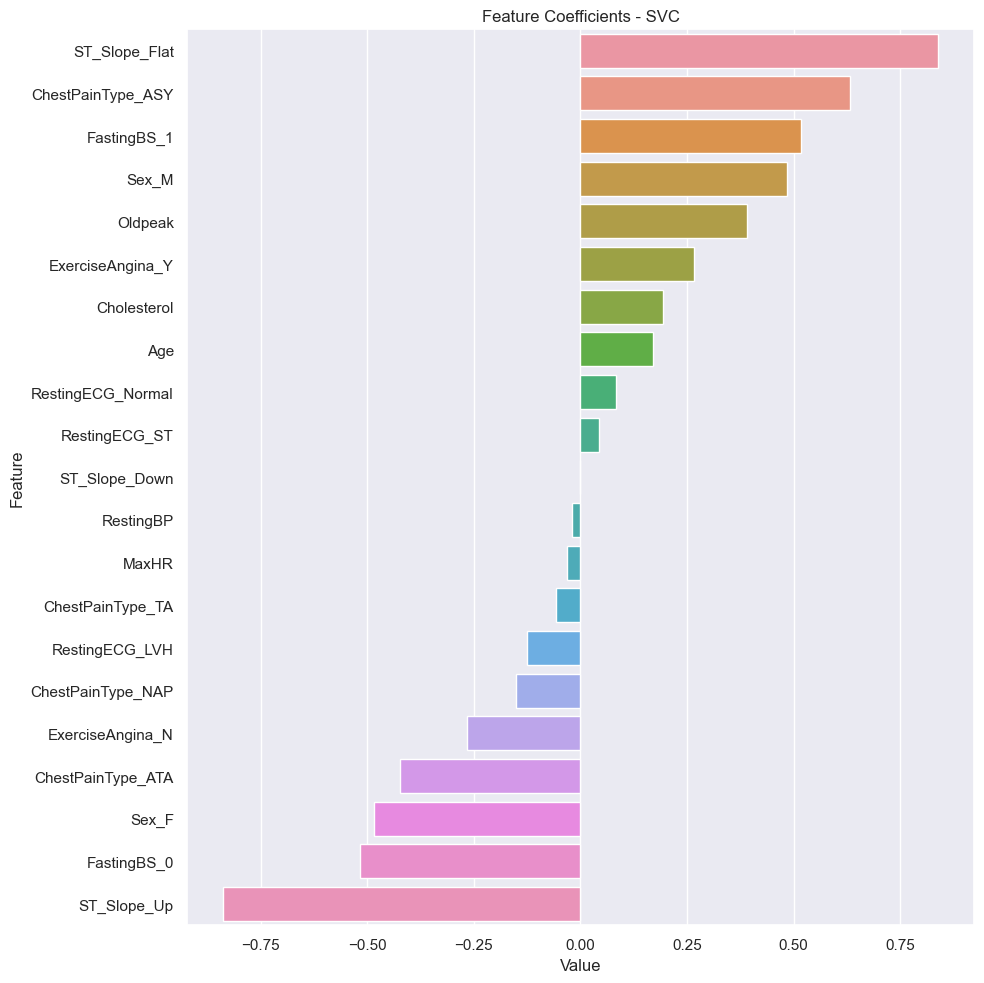

[ 0.17806098  0.04449002  0.21068769 -0.23009617  0.46554839 -0.4661499
  0.46724022  0.88029154 -0.50896086 -0.3388887  -0.03135166 -0.49852888
  0.4996192  -0.04824143  0.06558331 -0.01625156 -0.32019029  0.32128061
  0.10737301  0.77198688 -0.87826957]


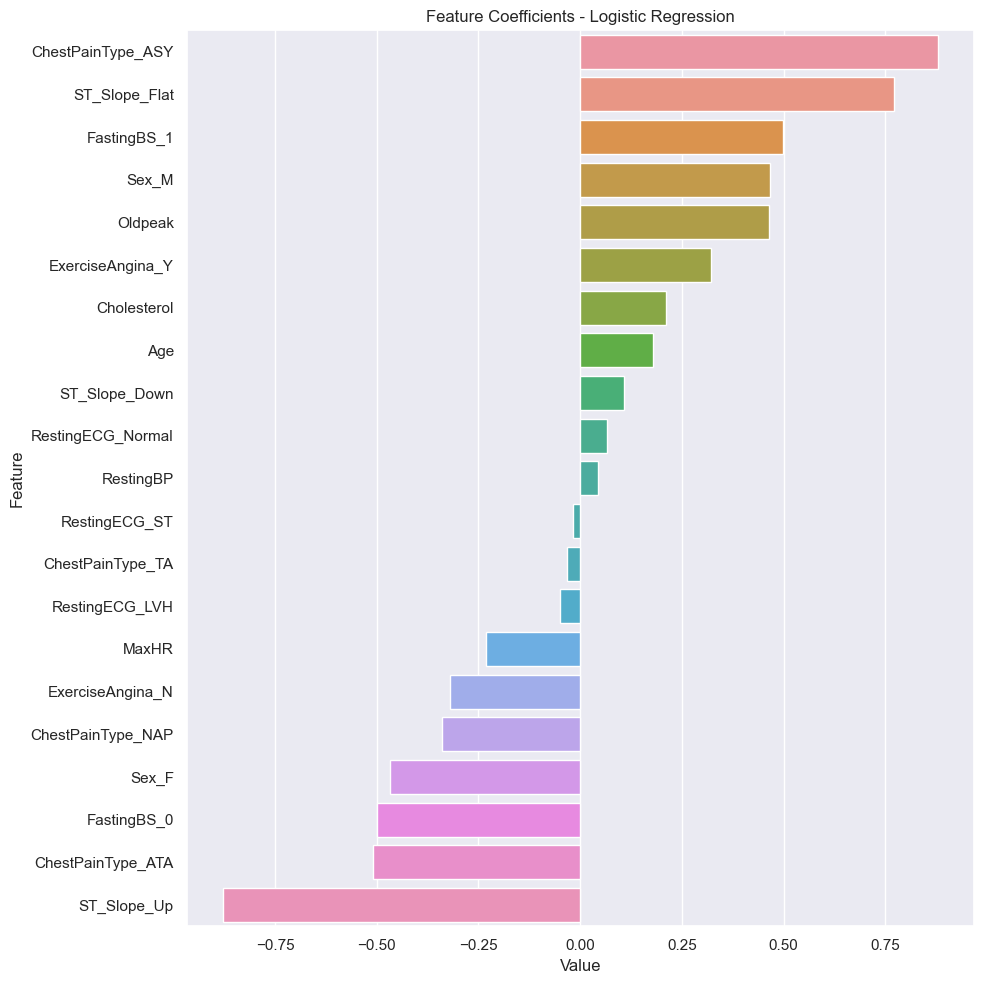

[0.04990661 0.05000779 0.04974957 0.07519463 0.1091375  0.02017258
 0.01600289 0.10896214 0.04217215 0.01854753 0.00514751 0.02819247
 0.02082763 0.01728507 0.0119375  0.00651706 0.0369191  0.06798659
 0.00375628 0.1130112  0.14856618]


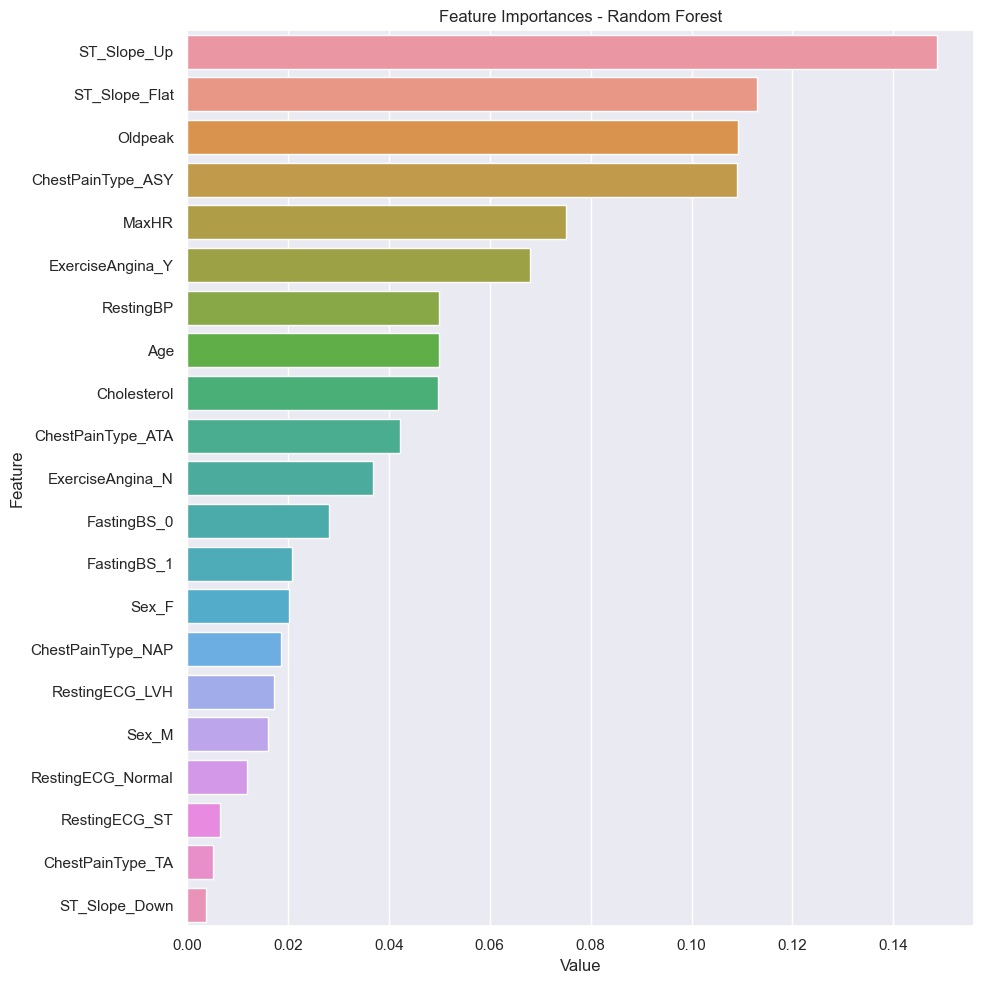

In [209]:
def plot_coefficients_or_importance(model, features, model_name, num=len(X)):
    if hasattr(model, 'feature_importances_'):  # For tree-based models
        values = model.feature_importances_
        print( values)
        title = 'Feature Importances'
    elif hasattr(model, 'coef_'):  # For models like Logistic Regression and linear SVC
        values = model.coef_[0]
        print(values)
        title = 'Feature Coefficients'
    else:
        print(f"{model_name} does not have feature importances or coefficients.")
        return

    feature_df = pd.DataFrame({'Value': values, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_df.sort_values(by="Value",ascending=False)[0:num])
    plt.title(title + ' - ' + model_name)
    plt.tight_layout()
    plt.show()

# Models and their names
models = {
    "SVC": best_svc,
    "Logistic Regression": best_lr,
    "Random Forest": best_rf
}

for model_name, model in models.items():
    plot_coefficients_or_importance(model, X_train, model_name)



### The chart depicts the coefficients of the features from the SVC model. 

Notable insights include:

* ST_Slope_Flat, ChestPainType_ASY, and FastingBS_1 have the highest positive coefficients. This indicates that as the values of these features increase, the likelihood of having heart disease also increases.

* On the other hand, features like ST_Slope_Up, FastingBS_0 have negative coefficients. This suggests that as the values of these features rise, the probability of having heart disease decreases.

* ST_Slope_Down has a coefficient close to zero, implying it might have a minimal influence on the model's prediction.

This analysis helps in understanding how each feature impacts the model's decision-making process. 

### Summary of Logistic Regression Features :

The features in the model give us clues about their importance in predicting heart disease:

* ChestPainType_ASY and ST_Slope_Flat stand out the most. When these values go up, it's a pretty clear sign of heart disease risk.
* On the other hand, a higher value of ST_Slope_Up tends to suggest a lower risk of heart disease. It's kind of like a protective factor.
* Other features like Sex_M (male gender), the old peak in the ECG, and having exercise-induced angina (ExerciseAngina_Y) also point towards a higher risk. So, if someone is male, has a specific pattern in their ECG, or gets chest pain during exercise, they might be at a higher risk.
* Interestingly, being female (Sex_F), having a certain fasting blood sugar level (FastingBS_0), or experiencing a specific type of chest pain (ChestPainType_ATA) seem to lower the risk of heart disease, according to the model.

### Random Forest Feature Importance Summary:

* ST_Slope_Up is the most influential feature, followed closely by ST_Slope_Flat, Oldpeak, and ChestPainType_ASY. These features have a significant impact on the model's decisions, indicating their importance in determining the outcome.

* MaxHR, ExerciseAngina_Y, and RestingBP also hold considerable importance, though not as much as the top features. These variables play a secondary role in influencing the predictions.

* Variables like ChestPainType_TA and ST_Slope_Down have the lowest importance values. It suggests that these features have minimal influence on the model's predictions in the current configuration.

* The diversity in the importance values indicates that while some features are crucial for the model's decisions, others play a minor role. It could be beneficial to consider feature selection or further domain-specific analysis to understand the underlying relationships better.

It's worth noting that the model's decisions are based on the combined effect of all features. While some features might have lower importance values, they can still play a vital role when interacting with other features.

#### SHARE YOUR LEARNING & INFERENCE

Write something like if my Feature (Ex. Glucose) is Greater than x Amount of Value then the Patient is Diabetic, hence this is a critical variable.

Sample Comments on diabetes status are as follows:

* In the case of diabetes, especially the Glucose, BMI and Age variables of women are an important factor.
* The rate of diabetes may be higher in middle-aged women aged 45-65 years.

In [210]:
## WHAT IS YOUR LEARNING FROM THE ML PROCESS AND DATASET USED WRITE A COMMENT BELOW


### Conclusion:


* All features exhibit both positive and negative correlations with heart disease. Those weakly correlated with heart disease often have multicollinearity with other features. This is further validated by the accuracy of our models, which were trained using all features.

*  Men seem to be more at risk than women.

*  If someone has a specific type of chest pain, called 'ASY', they might be more at risk of heart disease.

*  In males who experience the 'ASY' type of chest pain and have a higher ST_Slope UP rate, there is an increased likelihood of having heart disease.

* If someone gets chest pain during exercise, it's a warning sign.

* Oldpeak has a significant impact on detecting heart disease in patients. For further assessment, we can categorize the 'Oldpeak' values.

     * Below 0: 'Negative Depression' (requires clinical interpretation)
     * 0: 'No Depression'
     * 0.1 to 2: 'Mild Depression'
     * Greater than 2: 'Severe Depression'

* In our dataset, cholesterol had only a slight corelation with heart disease. We might need to check if the data contains 'good cholesterol' values.

* Women with certain blood sugar levels, or those who feel a type of chest pain called 'ATA' seem to be less at risk of heart disease.






### Finally done...I really curious about how you check such a lengthy assignment...Wish you all the best for checking process..